In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import basicFunctions
import pandas as pd
import json

print(str(tf.__version__))
print(str(tf.keras.__version__))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

2.1.0
2.2.4-tf
Num GPUs Available:  1
Num CPUs Available:  1


In [2]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}
import matplotlib
matplotlib.rc('font', **font)

def x_projection(image, axis=0, subtract_baseline=True):
    """Expects ndarray, return x projection"""
    proj = np.sum(image, axis=0)
    if subtract_baseline:
        return proj - min(proj)

    return proj

def y_projection(image, subtract_baseline=True):
    """Expects ndarray, return y projection"""
    proj = np.sum(image, axis=1)
    if subtract_baseline:
        return proj - min(proj)
    
    return proj

In [3]:
PATH = "/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/UpdateMeasuredData/AstraSimDat/"
NAME = "scalar_and_image_combined_hybrid_080420_"

In [4]:
# PATH = "/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/UpdateMeasuredData/AstraSimDat/"
# NAME = "scalar_and_image_combined_042920_withlaser_"

In [5]:
inputs_raw = np.load(PATH+NAME+"inputs.npy")
outputs_raw = np.load(PATH+NAME+"outputs.npy")
inputs_raw = inputs_raw[:,1:]

#### VARIABLE ORDERING IS VERY IMPORTANT AND NEEDS TO BE KEPT 

variable_names = ['maxb(2)', 'phi(1)', 'total_charge:value']
scalar_variables = len(variable_names)
output_names = ['end_core_emit_95percent_x', 'end_core_emit_95percent_y', 'end_core_emit_95percent_z', 'end_mean_kinetic_energy', 'end_mean_x', 'end_mean_y', 'end_n_particle_loss', 'end_norm_emit_x', 'end_norm_emit_y', 'end_norm_emit_z', 'end_sigma_x', 'end_sigma_xp', 'end_sigma_y', 'end_sigma_yp', 'end_sigma_z', 'end_total_charge']
scalar_outputs = len(output_names)



In [6]:
print("The x range for input images is = {:.7f}m to {:.7f}m".format(np.min(inputs_raw[:,scalar_variables:scalar_variables+2]), np.max(inputs_raw[:,scalar_variables:scalar_variables+2])))
print("The y range for input images is = {:.7f}m to {:.7f}m".format(np.min(inputs_raw[:,scalar_variables+2:scalar_variables+4]), np.max(inputs_raw[:,scalar_variables+2:scalar_variables+4])))

print("The x range for output images is = {:.7f}m to {:.7f}m".format(np.min(outputs_raw[:,scalar_outputs:scalar_outputs+2]), np.max(outputs_raw[:,scalar_outputs:scalar_outputs+2])))
print("The y range for output images is = {:.7f}m to {:.7f}m".format(np.min(outputs_raw[:,scalar_outputs+2:scalar_outputs+4]), np.max(outputs_raw[:,scalar_outputs+2:scalar_outputs+4])))


The x range for input images is = -0.0004257m to 0.0005007m
The y range for input images is = -0.0006514m to 0.0006954m
The x range for output images is = -0.1240805m to 0.1220257m
The y range for output images is = -0.1229257m to 0.1254276m


In [7]:
for ind, name in enumerate(variable_names):
    print(ind, name, np.max(inputs_raw[:,ind]), np.min(inputs_raw[:,ind]))

0 maxb(2) 0.09999763542764864 2.744530188381056e-06
1 phi(1) 9.999571786554105 -9.999847945792807
2 total_charge:value 299.99058958428014 0.00419923557080093


In [8]:
for ind, name in enumerate(output_names):
    print(ind, name, np.max(outputs_raw[:,ind]), np.min(outputs_raw[:,ind]))

0 end_core_emit_95percent_x 1.7792999999999994e-05 5.2413e-08
1 end_core_emit_95percent_y 1.7763999999999998e-05 4.7690999999999993e-08
2 end_core_emit_95percent_z 2.6629000000000002e-05 6.6926e-08
3 end_mean_kinetic_energy 760160.0 746430.0
4 end_mean_x 0.0011944999999999998 -0.00058999
5 end_mean_y 0.00068095 -0.0010791
6 end_n_particle_loss 7914.0 0.0
7 end_norm_emit_x 2.4224e-05 6.409199999999999e-08
8 end_norm_emit_y 2.2292e-05 5.8275e-08
9 end_norm_emit_z 33.065 0.11416
10 end_sigma_x 0.054716999999999995 0.00013097
11 end_sigma_xp 0.049589 7.947500000000001e-05
12 end_sigma_y 0.048781 0.00012728
13 end_sigma_yp 0.044206 7.8779e-05
14 end_sigma_z 0.007611399999999999 0.0020050000000000003
15 end_total_charge 2.0564627540842189e-10 4.199235570800999e-15


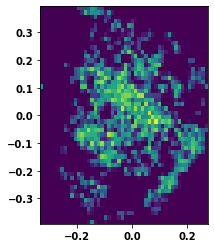

18.425


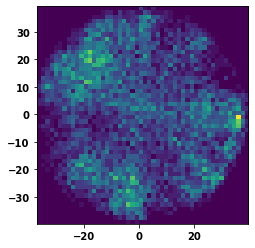

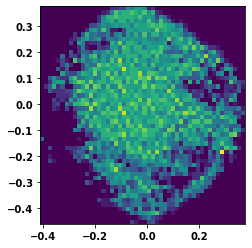

9.0491


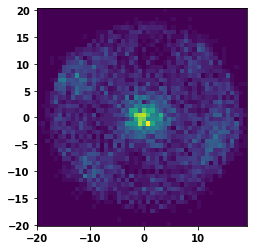

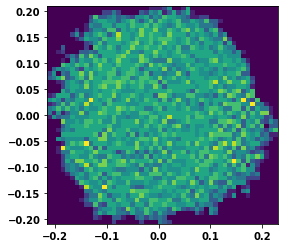

7.142499999999999


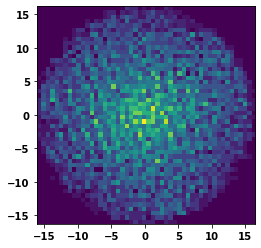

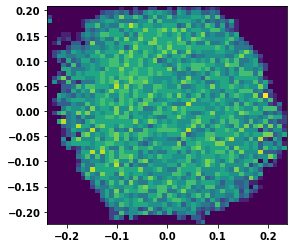

13.889999999999999


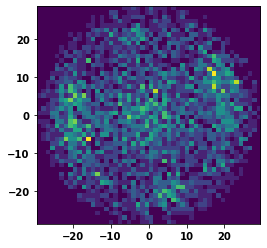

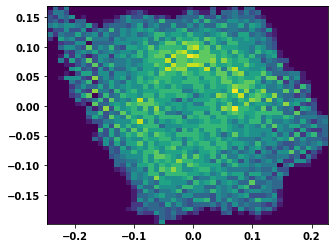

27.634


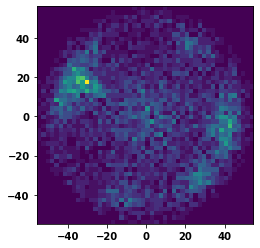

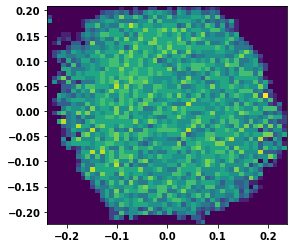

4.079999999999999


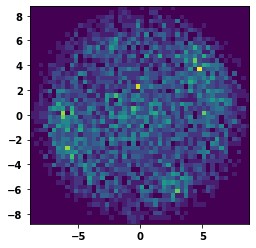

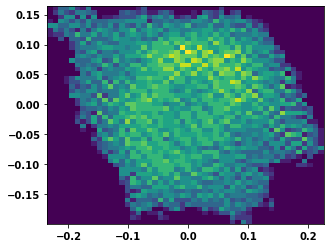

6.591600000000001


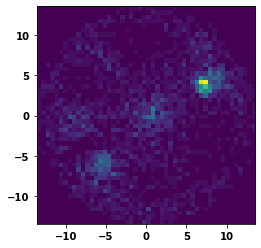

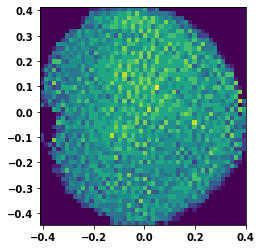

25.769999999999996


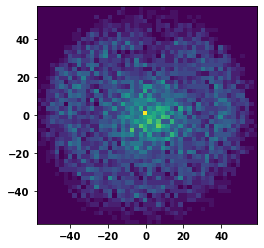

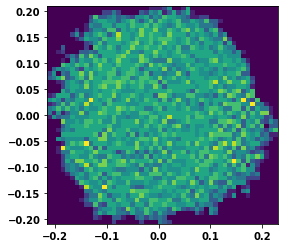

5.3876


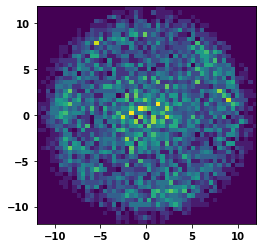

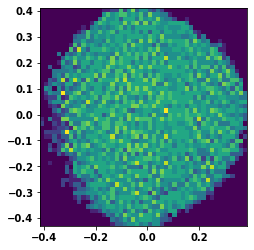

12.346


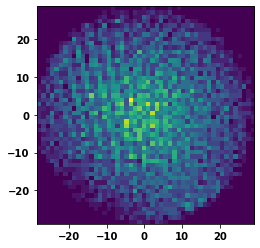

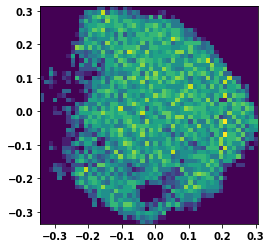

29.655


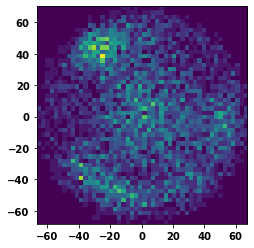

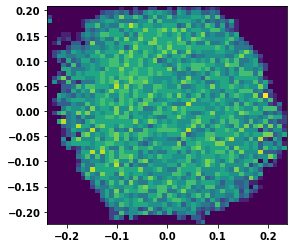

9.5464


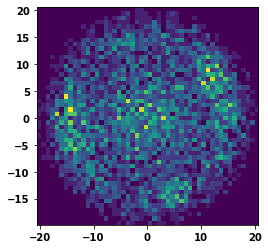

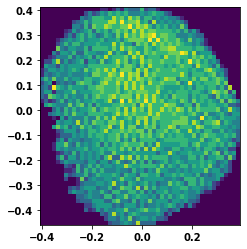

9.906299999999998


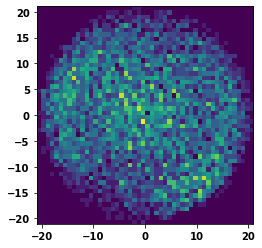

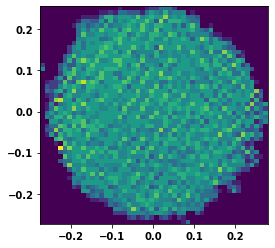

3.6277000000000004


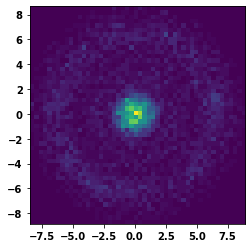

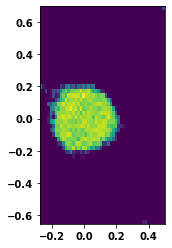

7.4148


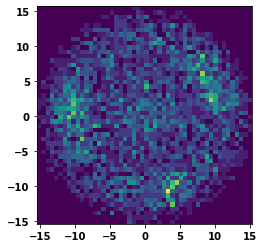

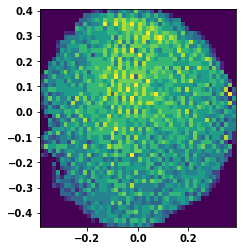

31.721


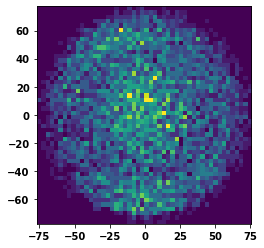

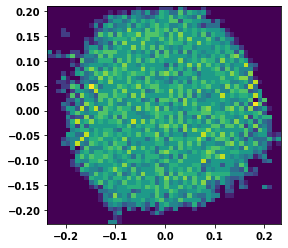

12.977


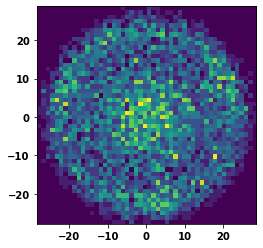

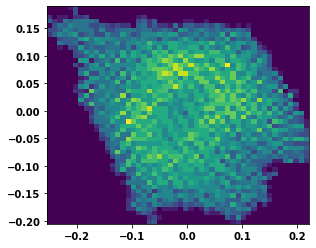

0.43969


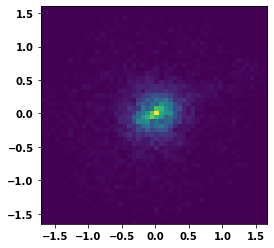

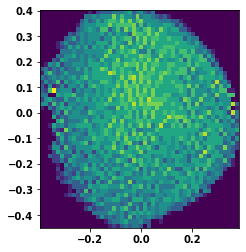

11.39


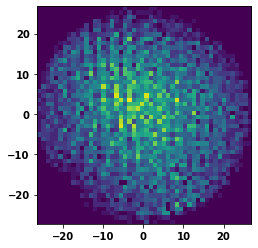

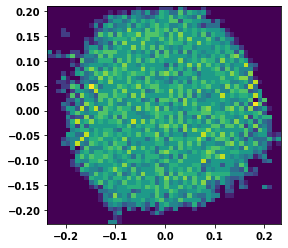

10.833


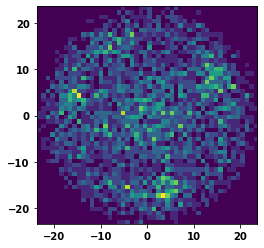

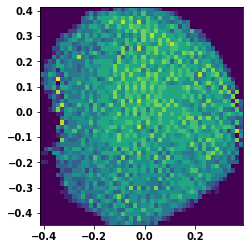

28.569999999999997


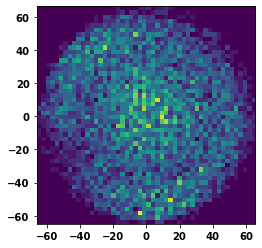

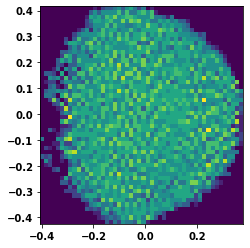

9.912799999999999


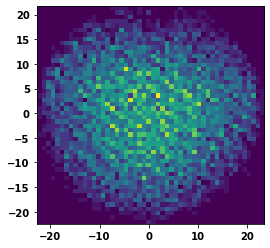

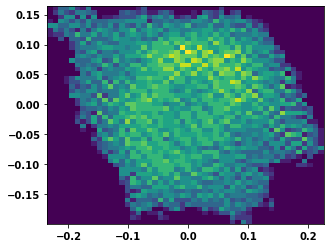

18.466


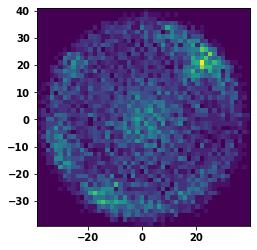

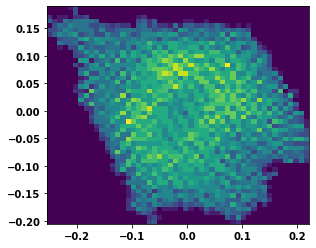

27.822000000000003


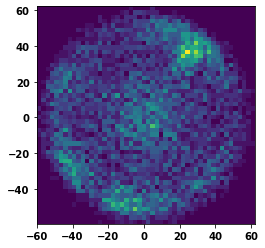

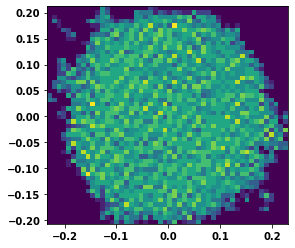

5.767


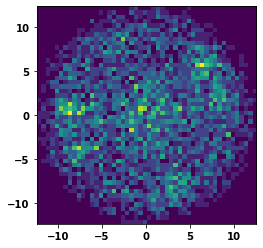

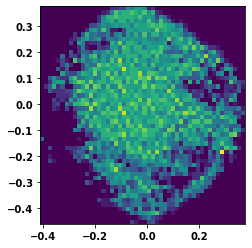

26.262


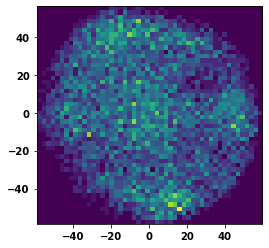

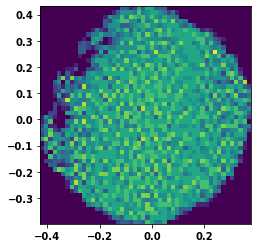

30.294


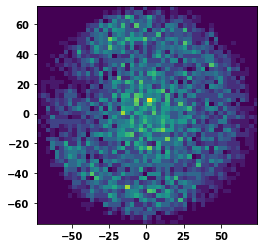

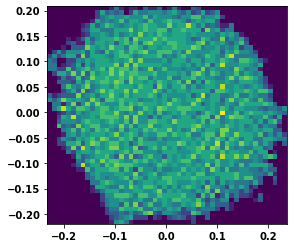

13.847999999999999


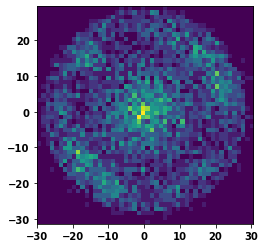

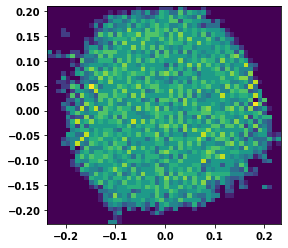

20.028000000000002


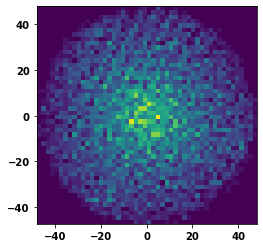

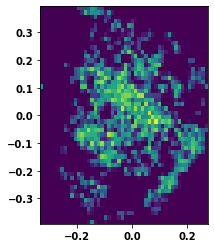

5.605600000000001


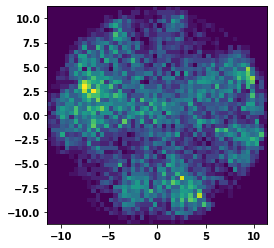

In [9]:
for i in range(30):
    ind = np.random.randint(np.shape(inputs_raw)[0])
    plt.imshow(inputs_raw[ind, scalar_variables+4:].reshape(50,50), extent = inputs_raw[ind, scalar_variables:scalar_variables+4]*1E3)
    plt.show()
    
    plt.imshow(outputs_raw[ind, scalar_outputs+4:].reshape(50,50), extent = outputs_raw[ind, scalar_outputs:scalar_outputs+4]*1E3)
    print(outputs_raw[ind,10]*1E3)
    plt.show()

In [10]:
# basicFunctions.MakeAllHistograms(inputs_raw,outputs_raw, variable_names, output_names, nbins = 50)

In [11]:
inputs = keras.Input(shape=(50, 50, 1), name='img')
scalar_input = keras.Input(shape = (scalar_variables+4,))

x = layers.Conv2D(10, 4, activation='relu',strides=1,padding='same')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x) 
x = layers.Conv2D(10, 4, activation='relu',strides=1,padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)                 
x = layers.Conv2D(10, 4, activation='relu',strides=1,padding='same')(x)

x = layers.Flatten()(x)
x = layers.Concatenate()([x, scalar_input])

x = layers.Dense(512,activation='relu')(x)
x0 = layers.Dense(256,activation='relu')(x)

x = layers.Dense(512,activation='relu')(x)
x = layers.Dense(14*14*10,activation='relu')(x)
x = layers.Reshape((14,14,10))(x)
x = layers.Conv2D(10, 4, activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(10, 4, activation='relu',padding='valid')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(10, 4, activation='relu',padding='same')(x)
outputs = layers.Conv2D(1, 1, activation='relu',padding='same')(x)
scalar_output = layers.Dense(scalar_outputs+4,activation='linear')(x0)

model = keras.Model([inputs, scalar_input], [outputs, scalar_output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 50, 50, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 10)   170         img[0][0]                        
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 25, 25, 10)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 25, 25, 10)   1610        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [12]:
model.compile(optimizer='adam',
              loss="mean_squared_error")

In [13]:
def image_scale(xdata):  
    x_scale = np.max(xdata)
    x_offset = 0
    scaled_x = ((xdata/x_scale)-x_offset)   
    return scaled_x, x_scale, x_offset
def image_unscale(image_values, image_scale, image_offset):  
    data_scaled = ((image_values+image_offset)*image_scale)  
    return data_scaled

In [14]:
scaled_x, x_scales, x_offsets = basicFunctions.do_scaling(inputs_raw[:,0:scalar_variables+4],0, 1)
scaled_x_img, x_scale_image, x_offset_image = image_scale(inputs_raw[:,(scalar_variables+4):])
scaled_y, y_scales, y_offsets = basicFunctions.do_scaling(outputs_raw[:,0:scalar_outputs+4],0, 1)
scaled_y_img, y_scale_image, y_offset_image = image_scale(outputs_raw[:,(scalar_outputs+4):])

In [15]:
print(np.min(scaled_x,axis=0))
print(np.max(scaled_x,axis=0))
print(np.min(scaled_x_img,axis=1))
print(np.max(scaled_x_img,axis=1))

print(np.min(scaled_y,axis=0))
print(np.max(scaled_y,axis=0))
print(np.min(scaled_y_img, axis = 1))
print(np.max(scaled_y_img, axis = 1))
print(scaled_x.shape)
print(scaled_y.shape)
print(scaled_x_img.shape)
print(scaled_y_img.shape)

[0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0.31578947 0.31578947 0.31578947 ... 0.26315789 0.26315789 0.26315789]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0.08757062 0.04237288 0.05367232 ... 0.04237288 0.05084746 0.04237288]
(79400, 7)
(79400, 20)
(79400, 2500)
(79400, 2500)


In [16]:
x_scales.append(x_scale_image)
x_offsets.append(x_offset_image)
y_scales.append(y_scale_image)
y_offsets.append(y_offset_image)
X_RS = np.concatenate((scaled_x, scaled_x_img), axis = 1)
Y_RS = np.concatenate((scaled_y, scaled_y_img), axis = 1)

In [17]:
# def new_do_scaling(xdata, lower, upper, scales, offsets):  
#     l,n = xdata.shape
#     scaled_x = np.zeros((l,n))

#     for i in range(n):
#         dat = xdata[:,i]
#         sc = scales[i]
#         off = offsets[i]
#         scaled = basicFunctions.scale_data(dat,off,sc,lower,upper)
#         scaled_x[:,i] = scaled
        
#     return scaled_x

# def new_image_scale(xdata, x_scale): 
#     x_offset = 0
#     scaled_x = ((xdata/x_scale)-x_offset)   
#     return scaled_x

In [18]:
### Scale reserved data using scales from the TESTING dataset

In [19]:
# reserve_scaled_x = new_do_scaling(reserve_inputs[:,0:scalar_variables+4],0, 1, x_scales, x_offsets)
# reserve_scaled_x_img = new_image_scale(reserve_inputs[:,(scalar_variables+4):], x_scale_image)
# reserve_scaled_y = new_do_scaling(reserve_outputs[:,0:scalar_outputs+4],0, 1, y_scales, y_offsets)
# reserve_scaled_y_img = new_image_scale(reserve_outputs[:,(scalar_outputs+4):], x_scale_image)

In [20]:
# print(np.min(reserve_scaled_x,axis=0))
# print(np.max(reserve_scaled_x,axis=0))
# print(np.min(reserve_scaled_x_img,axis=1))
# print(np.max(reserve_scaled_x_img,axis=1))


# print(np.min(reserve_scaled_y,axis=0))
# print(np.max(reserve_scaled_y,axis=0))
# print(np.min(reserve_scaled_y_img, axis = 1))
# print(np.max(reserve_scaled_y_img, axis = 1))
# print(np.shape(reserve_scaled_x))
# print(np.shape(reserve_scaled_y))
# print(np.shape(reserve_scaled_x_img))
# print(np.shape(reserve_scaled_y_img))

In [21]:
# X_RS_reserved = np.concatenate((reserve_scaled_x, reserve_scaled_x_img), axis = 1)
# Y_RS_reserved = np.concatenate((reserve_scaled_y, reserve_scaled_y_img), axis = 1)

In [22]:
# percents = np.arange(3,6,1)/100
# print(percents)

In [23]:
# total_samples = np.shape(X_RS)[0]
# model

# for ind, percent in enumerate(percents):
#     samples_needed = (total_samples*percent)/0.8
#     test_size = samples_needed/total_samples

#     X_train, X_test, Y_train, Y_test = train_test_split(X_RS, Y_RS, test_size=test_size, random_state=42)
#     X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, test_size=0.2, random_state=42)
#     X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)

#     print(100*np.shape(X_train)[0]/total_samples)
#     print(np.shape(X_train))
#     print(np.shape(X_val))
#     print(np.shape(X_test))
#     print(np.shape(Y_train))
#     print(np.shape(Y_val))
#     print(np.shape(Y_test))

In [24]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_RS, Y_RS, test_size=0.0375, random_state=42)
# X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, test_size=0.2, random_state=42)
# X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)

# scales = {"x_scales": x_scales, 
#           "x_offsets": x_offsets,
#           "y_scales": y_scales,
#           "y_offsets": y_offsets}
# training_data = {"X_train": X_train, "Y_train": Y_train}
# validation_data = {"X_val": X_val, "Y_val": Y_val}
# testing_data = {"X_test": X_test, "Y_test": Y_test}

# print(100*np.shape(X_train)[0]/total_samples)
# print(np.shape(X_train))
# print(np.shape(X_val))
# print(np.shape(X_test))
# print(np.shape(Y_train))
# print(np.shape(Y_val))
# print(np.shape(Y_test))

In [25]:
MODEL_NAME = "CNN_081120_"


X_train = np.load(PATH+MODEL_NAME+"inputs_train.npy")
X_val = np.load(PATH+MODEL_NAME+"inputs_val.npy")
X_test = np.load(PATH+MODEL_NAME+"inputs_test.npy")

Y_train = np.load(PATH+MODEL_NAME+"outputs_train.npy")
Y_val = np.load(PATH+MODEL_NAME+"outputs_val.npy")
Y_test = np.load(PATH+MODEL_NAME+"outputs_test.npy")

x_scales = np.load(PATH+MODEL_NAME+"_x_scales.npy")
y_scales = np.load(PATH+MODEL_NAME+"_y_scales.npy")
x_offsets = np.load(PATH+MODEL_NAME+"_x_offsets.npy")
y_offsets = np.load(PATH+MODEL_NAME+"_y_offsets.npy")

# np.save(PATH+MODEL_NAME+"_x_scales.npy", x_scales)
# np.save(PATH+MODEL_NAME+"_y_scales.npy", y_scales)
# np.save(PATH+MODEL_NAME+"_x_offsets.npy", x_offsets)
# np.save(PATH+MODEL_NAME+"_y_offsets.npy", y_offsets)

# np.save(PATH+MODEL_NAME+"inputs_train.npy", X_train)
# np.save(PATH+MODEL_NAME+"inputs_val.npy", X_val)
# np.save(PATH+MODEL_NAME+"inputs_test.npy", X_test)

# np.save(PATH+MODEL_NAME+"outputs_train.npy", Y_train)
# np.save(PATH+MODEL_NAME+"outputs_val.npy", Y_val)
# np.save(PATH+MODEL_NAME+"outputs_test.npy", Y_test)

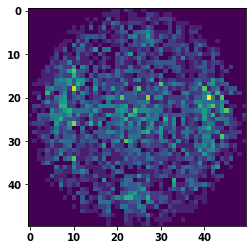

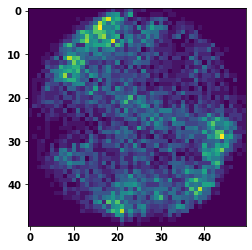

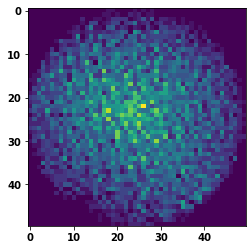

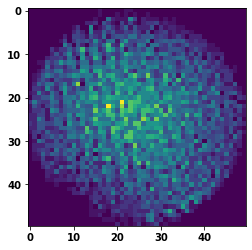

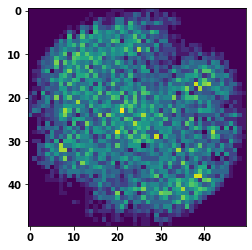

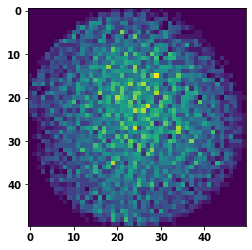

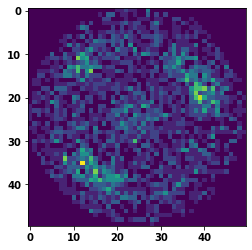

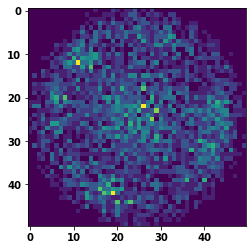

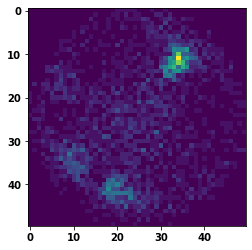

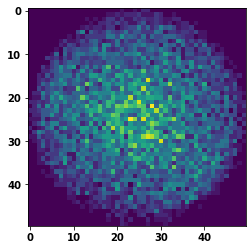

In [26]:

# basicFunctions.MakeAllHistograms(X_test[:,0:scalar_variables],Y_test[:,0:scalar_outputs], variable_names, output_names)
for i in range(10):
    ind = np.random.randint(np.shape(X_test)[0])
#     plt.imshow(X_test[ind, scalar_variables+4:].reshape(50,50))
#     print(np.max(X_test[ind, scalar_variables+4:]))
#     print(np.min(X_test[ind, scalar_variables+4:]))
#     plt.show()
    
    plt.imshow(Y_test[ind, scalar_outputs+4:].reshape(50,50))
    #print(np.max(Y_test[ind, scalar_outputs+4:]))
    #print(np.min(Y_test[ind, scalar_outputs+4:]))
    plt.show()

In [27]:
# n = 10
# plt.figure(figsize = (10,4))
# plt.hist(outputs_raw[:,n]*1E3, range = (0,10), bins = 20)
# plt.title("Training Data Distribution: " + output_names[n])
# plt.xlabel("millimeter")

# n = 12
# plt.figure(figsize = (10,4))
# plt.hist(outputs_raw[:,n]*1E3, range = (0,10), bins = 20)
# plt.title("Training Data Distribution: " +output_names[n])
# plt.xlabel("millimeter")

In [28]:
# n = 3
# plt.figure(figsize = (10,4))
# plt.hist(outputs_raw[:,n], bins = 20)
# plt.title("Training Data Distribution: " + output_names[n])
# plt.xlabel("millimeter")

# n = n+4
# plt.figure(figsize = (10,4))
# plt.hist(outputs_raw[:,n]*1E6, bins = 20, range = (0,5))
# plt.title("Training Data Distribution: " +output_names[n])
# plt.xlabel("millimeter")

In [29]:
X_train_img = X_train[:,(scalar_variables+4):].reshape(X_train.shape[0],50,50,1)
X_train_s = X_train[:,0:(scalar_variables+4)]

X_val_img = X_val[:,(scalar_variables+4):].reshape(X_val.shape[0],50,50,1)
X_val_s = X_val[:,0:(scalar_variables+4)]

X_test_img = X_test[:,(scalar_variables+4):].reshape(X_test.shape[0],50,50,1)
X_test_s = X_test[:,0:(scalar_variables+4)]

# X_test_img = reserve_scaled_x_img.reshape(reserve_scaled_x_img.shape[0],50,50,1)
# X_test_s = reserve_scaled_x


print(np.shape(X_test_img))
print(np.shape(X_test_s))
###

Y_train_img = Y_train[:,(scalar_outputs+4):].reshape(Y_train.shape[0],50,50,1)
Y_train_s = Y_train[:,0:(scalar_outputs+4)]

Y_val_img = Y_val[:,(scalar_outputs+4):].reshape(Y_val.shape[0],50,50,1)
Y_val_s = Y_val[:,0:(scalar_outputs+4)]

Y_test_img = Y_test[:,(scalar_outputs+4):].reshape(Y_test.shape[0],50,50,1)
Y_test_s = Y_test[:,0:(scalar_outputs+4)]


print(np.shape(Y_test_img))
print(np.shape(Y_test_s))



(7540, 50, 50, 1)
(7540, 7)
(7540, 50, 50, 1)
(7540, 20)


In [30]:
model.load_weights(PATH+MODEL_NAME+"Initial_Model_Save.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 50, 50, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 10)   170         img[0][0]                        
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 25, 25, 10)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 25, 25, 10)   1610        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [31]:
# import h5py


# start = time.time()
# mc = tf.keras.callbacks.ModelCheckpoint(PATH+MODEL_NAME+'best_model_chk.h5', monitor='val_loss', mode='min', save_best_only=True)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", verbose=1, patience=250)

# history = model.fit(x=[X_train_img, X_train_s], y=[Y_train_img, Y_train_s], validation_data=([X_val_img, X_val_s],[Y_val_img,Y_val_s]),batch_size=100, shuffle='true',epochs=5000, verbose='false', callbacks=[mc, es, basicFunctions.plot_losses])

# history_df = pd.DataFrame(history.history)
 
# hist_csv_file = PATH+MODEL_NAME+'History.csv'
# with open(hist_csv_file, mode='w') as f:
#     history_df.to_csv(f)
    
# with open(PATH+MODEL_NAME+'model_architecture.json', 'w') as f:
#     f.write(model.to_json())
# model.save_weights(PATH+MODEL_NAME+"Initial_Model_Save.h5")
# stop = time.time()

import shutil


description_file = "description-both.json"
basicFunctions.mySaveModel(PATH+MODEL_NAME+"Initial_Model_Save.h5",
            description_file,
            PATH+MODEL_NAME+"model_architecture.json",
            x_scales,
            x_offsets,
            y_scales,
            y_offsets, lower = 0, upper = 1)
shutil.copy(PATH+MODEL_NAME+"Initial_Model_Save.h5", PATH+MODEL_NAME+"SurrogateModel.h5")

# print('Time to run in minutes was: ', (stop-start)/60) 

Type is both


'/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/UpdateMeasuredData/AstraSimDat/CNN_081120_SurrogateModel.h5'

In [32]:
name = "testing"
description = "testinggggg"
input_names = ['maxb(2)', 'phi(1)', 'total_charge:value','in_xmin', 'in_xmax', 'in_ymin', 'in_ymax']
input_units = ['kG', 'Deg', 'PicoCoul', 'mm','mm','mm','mm']
input_defaults = [0.1, 0, 75, -0.40510409,  0.37911152, -0.42488133,  0.41626165]
input_ranges = [[0,0.1], [-10,10], [0,300], [-1,1], [-1,1], [-1,1],[-1,1]]
output_names = ['end_core_emit_95percent_x', 'end_core_emit_95percent_y', 'end_core_emit_95percent_z', 'end_mean_kinetic_energy', 'end_mean_x', 'end_mean_y', 'end_n_particle_loss', 'end_norm_emit_x', 'end_norm_emit_y', 'end_norm_emit_z', 'end_sigma_x', 'end_sigma_xp', 'end_sigma_y', 'end_sigma_yp', 'end_sigma_z', 'end_total_charge', 'out_xmin', 'out_xmax', 'out_ymin', 'out_ymax']
output_units = ["meter-radians","meter-radians","meter-radians","Electron-volts (eV)","meters","meters","Number","meter-radians","meter-radians","meter-radians","meters","radians","meters","radians","meters","Coulombs (C)","Meters (m)","Meters (m)","Meters (m)","Meters (m)"]

my_description = basicFunctions.makeDescription(
    name, 
    description, 
    input_names,
    input_units,
    input_defaults, 
    input_ranges,
    output_names, 
    output_units)

with open('my_description.json', 'w') as f:
    json.dump(my_description, f)

In [33]:
!pwd

/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/github/MeasuredDataUpdating


In [34]:
for i, name in enumerate(input_names):
    print(i, name, x_offsets[i], x_scales[i])
    
for i, name in enumerate(output_names):
    print(i, name, y_scales[i],y_offsets[i])

0 maxb(2) 2.744530188381056e-06 0.09999489089746026
1 phi(1) -9.999847945792807 19.99941973234691
2 total_charge:value 0.00419923557080093 299.98639034870934
3 in_xmin -0.00042565376116581317 0.00021191817864628688
4 in_xmax 0.00021010182307281268 0.00029055321080368227
5 in_ymin -0.0006514238067658374 0.0004521030804765639
6 in_ymax 0.0001637250305446969 0.0005316531475509838
0 end_core_emit_95percent_x 1.7740586999999995e-05 5.2413e-08
1 end_core_emit_95percent_y 1.7715802e-05 4.8197999999999986e-08
2 end_core_emit_95percent_z 2.6562074000000003e-05 6.6926e-08
3 end_mean_kinetic_energy 13730.0 746430.0
4 end_mean_x 0.0017844899999999997 -0.00058999
5 end_mean_y 0.00176005 -0.0010791
6 end_n_particle_loss 7914.0 0.0
7 end_norm_emit_x 2.4159908e-05 6.409199999999999e-08
8 end_norm_emit_y 2.2233027e-05 5.8973e-08
9 end_norm_emit_z 32.95084 0.11416
10 end_sigma_x 0.054586029999999994 0.00013097
11 end_sigma_xp 0.049509525 7.947500000000001e-05
12 end_sigma_y 0.04865372 0.00012728
13 end_

In [44]:
# def format_input(self, input_dictionary):
#         # scale inputs
#         input_dictionary = self.scale_inputs(input_dictionary)

#         image = input_dictionary["input_image"].reshape(1, 50, 50, 1)
#         scalar_inputs = np.array([
#             input_dictionary['maxb(2)'],
#             input_dictionary['phi(1)'],
#             input_dictionary['total_charge:value'],
#             input_dictionary['in_xmin'],
#             input_dictionary['in_xmax'],
#             input_dictionary['in_ymin'],
#             input_dictionary['in_ymax']
#             ]).reshape((1,7))


#         model_input = [image_input, scalar_inputs]
#         return  model_input


#     def parse_output(self, model_output):
#         parsed_output = {}

#         image_output = model_output[0]
#         scalar_output = model_output[1]

#         parsed_output["out_xmin"] = scalar_output[-4]
#         parsed_output["out_xmax"] = scalar_output[-3]
#         parsed_output["out_ymin"] = scalar_output[-2]
#         parsed_output["out_ymax"] = scalar_output[-1]

#         parsed_output["x:y"] = image_output.reshape((50,50))

#         parsed_output.update(dict(zip(self.output_variables.keys(), scalar_output.T)))

#         # unscale
#         parsed_output = self.unscale_outputs(parsed_output)
        
#         return parsed_output

In [35]:
PATH+MODEL_NAME+"SurrogateModel.h5"

'/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/UpdateMeasuredData/AstraSimDat/CNN_081120_SurrogateModel.h5'

In [36]:
### resave the test data!!!

In [37]:
X_unscale_test_scalar = basicFunctions.do_unscaling(X_test_s, 0, 1, x_scales, x_offsets)
X_unscale_test_img = image_unscale(X_test_img.reshape(X_test_img.shape[0],2500), x_scales[-1], x_offsets[-1])

In [38]:
print(np.shape(X_unscale_test_scalar))
print(np.shape(Y_test_s))

(7540, 7)
(7540, 20)


In [39]:
Y_predicted = model.predict([X_test_img, X_test_s])

Y_unscale_test_scalar = basicFunctions.do_unscaling(Y_test_s, 0, 1, y_scales, y_offsets)
print(np.shape(Y_unscale_test_scalar))
Y_unscale_test_img = image_unscale(Y_test_img.reshape(Y_test_img.shape[0],2500), y_scales[-1], y_offsets[-1])
print(np.shape(Y_unscale_test_img))

Y_pred_s = Y_predicted[1]
Y_pred_img = Y_predicted[0]

Y_unscale_pred_scalar = basicFunctions.do_unscaling(Y_pred_s, 0, 1, y_scales, y_offsets)
Y_unscale_pred_img = image_unscale(Y_pred_img.reshape(Y_pred_img.shape[0],2500), y_scales[-1], y_offsets[-1])
print(np.shape(Y_unscale_pred_scalar))
print(np.shape(Y_unscale_pred_img))

(7540, 20)
(7540, 2500)
(7540, 20)
(7540, 2500)


6749


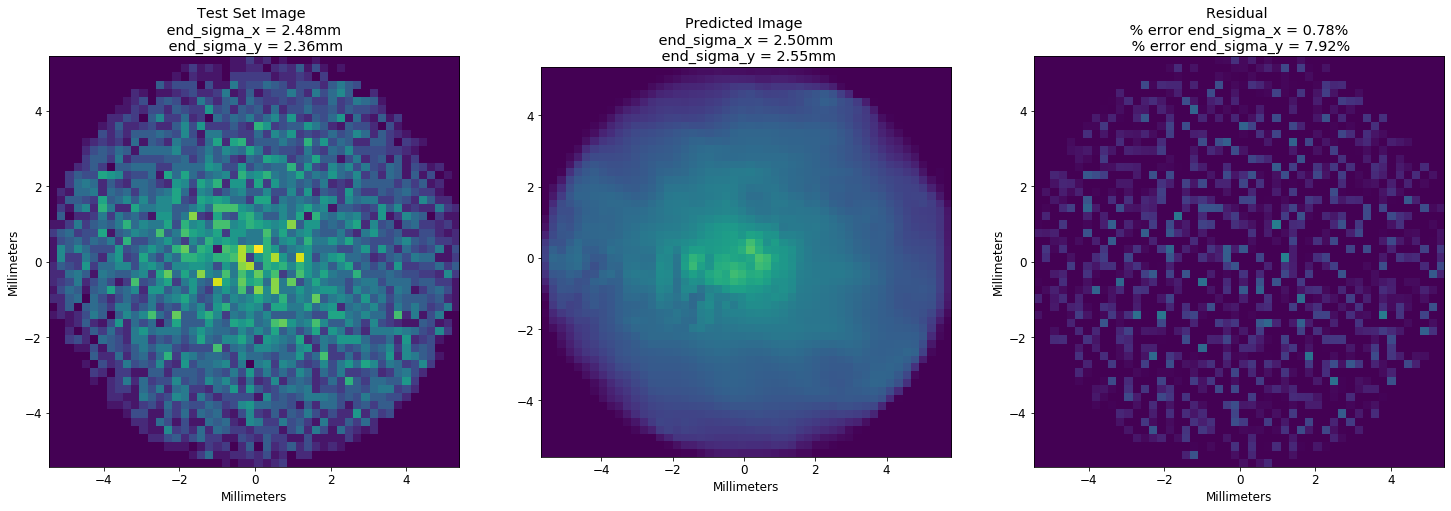

1903


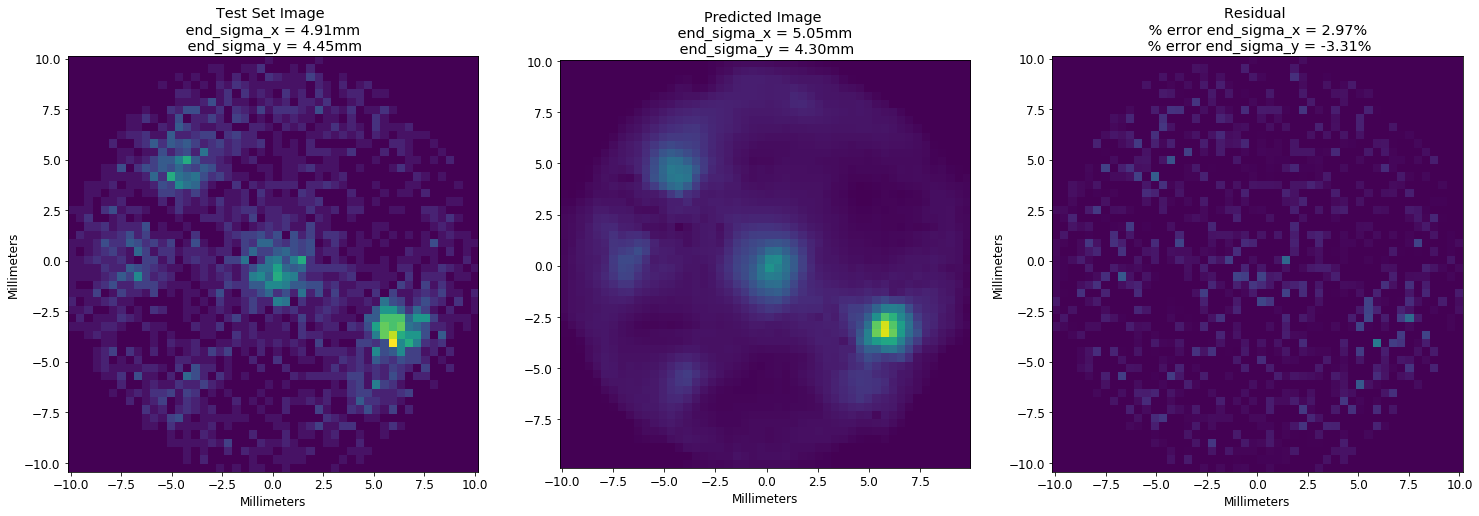

6381


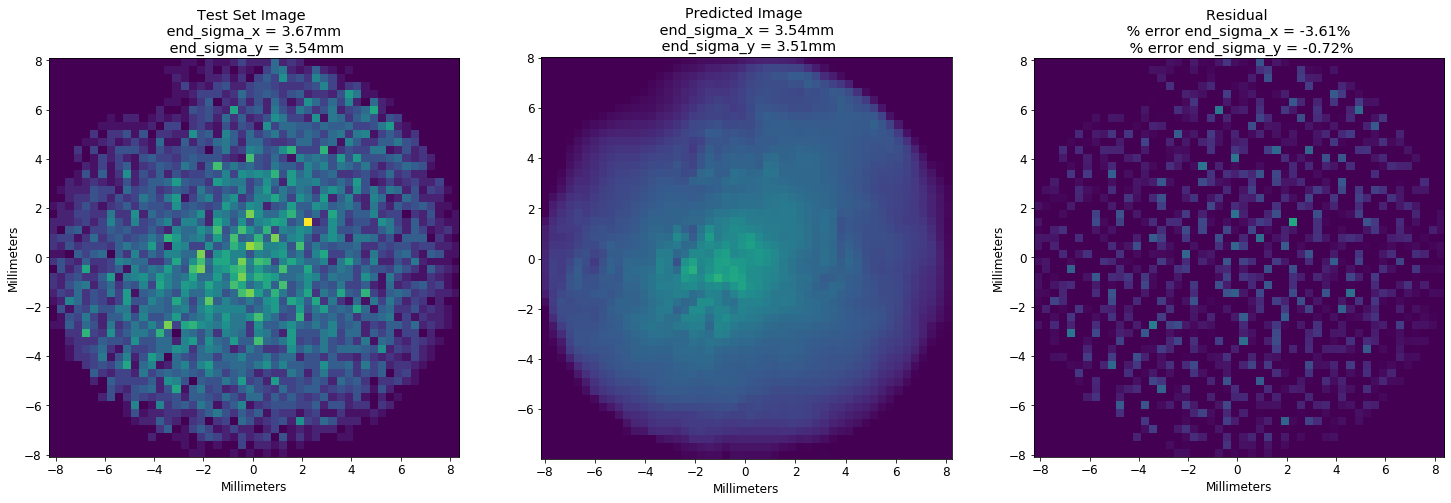

5804


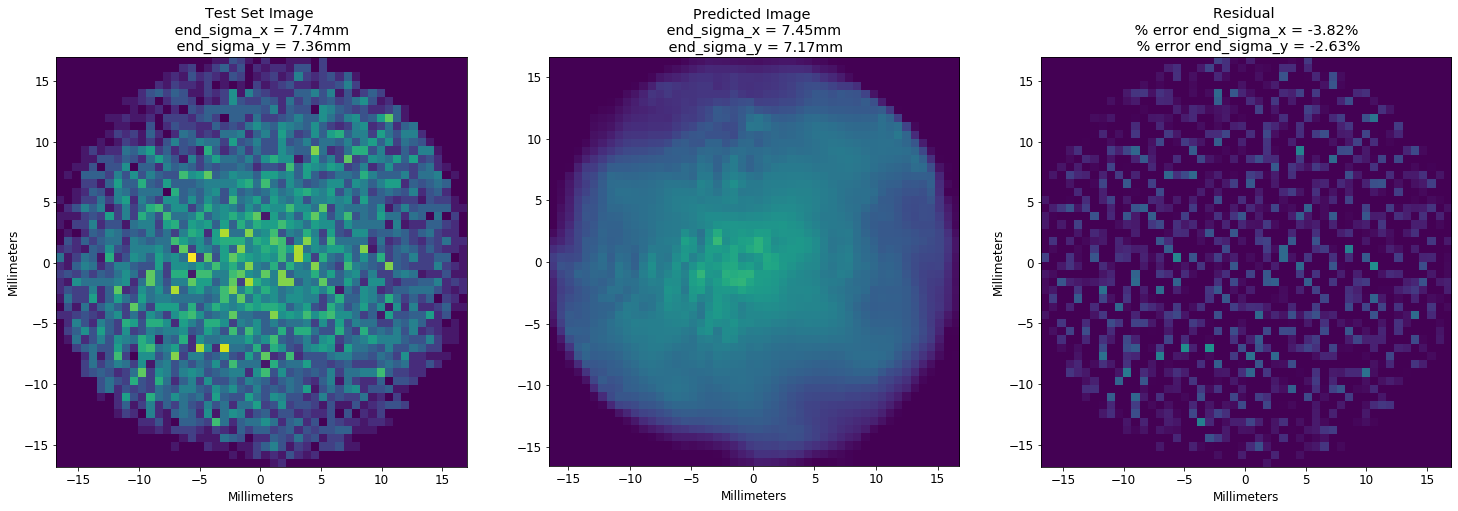

3876


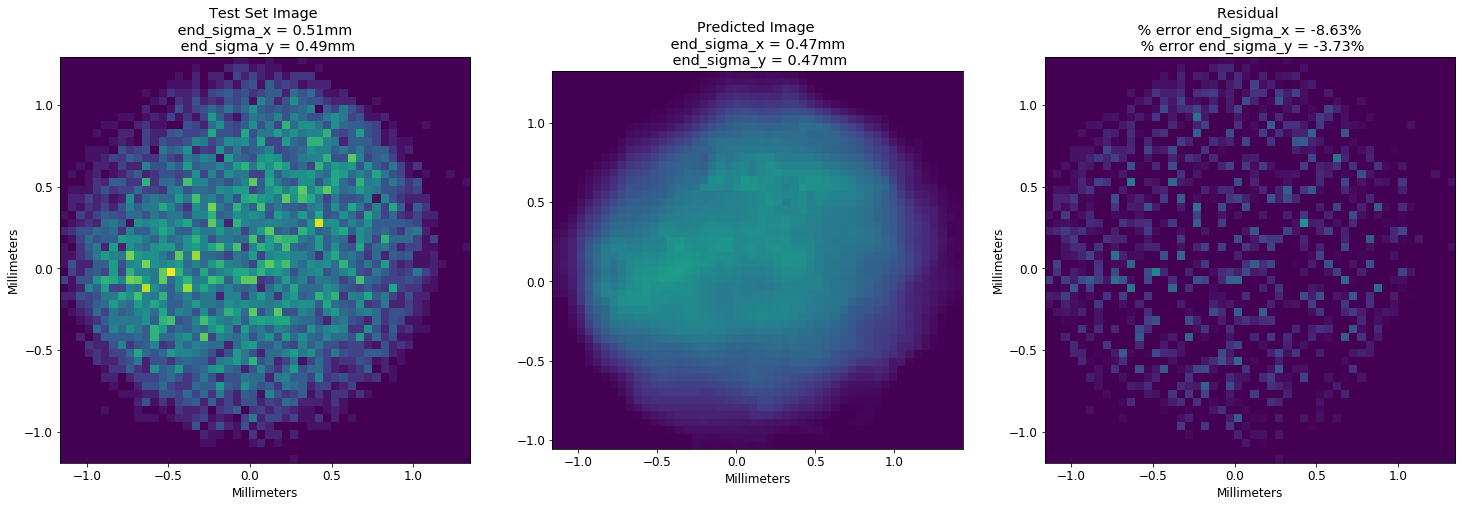

3038


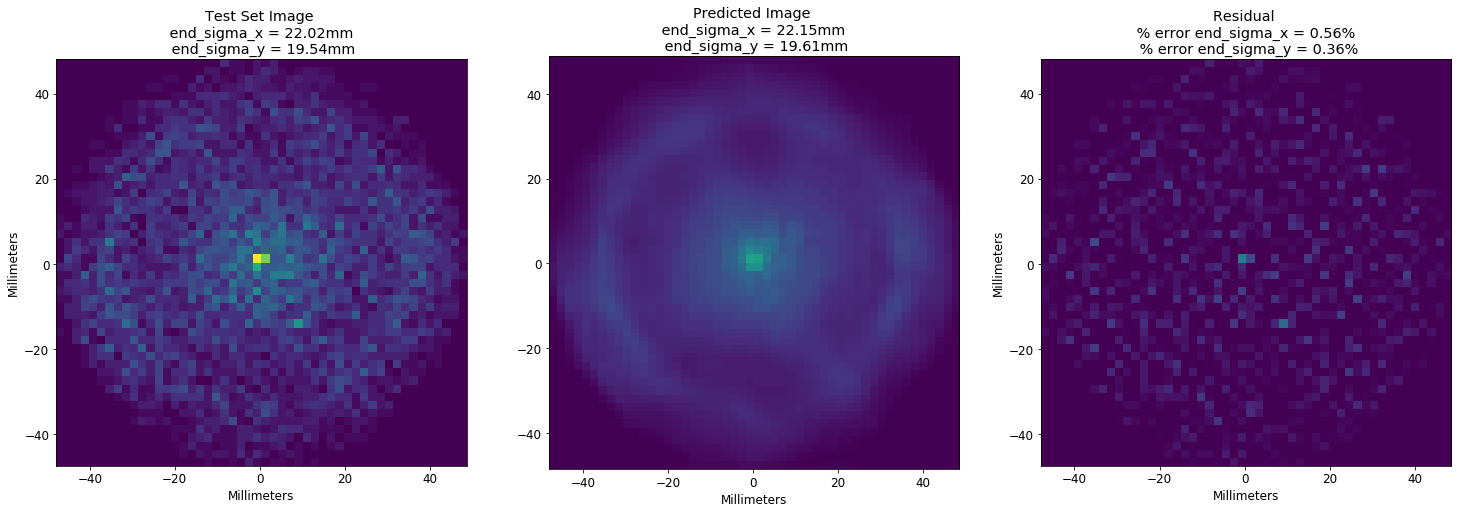

3905


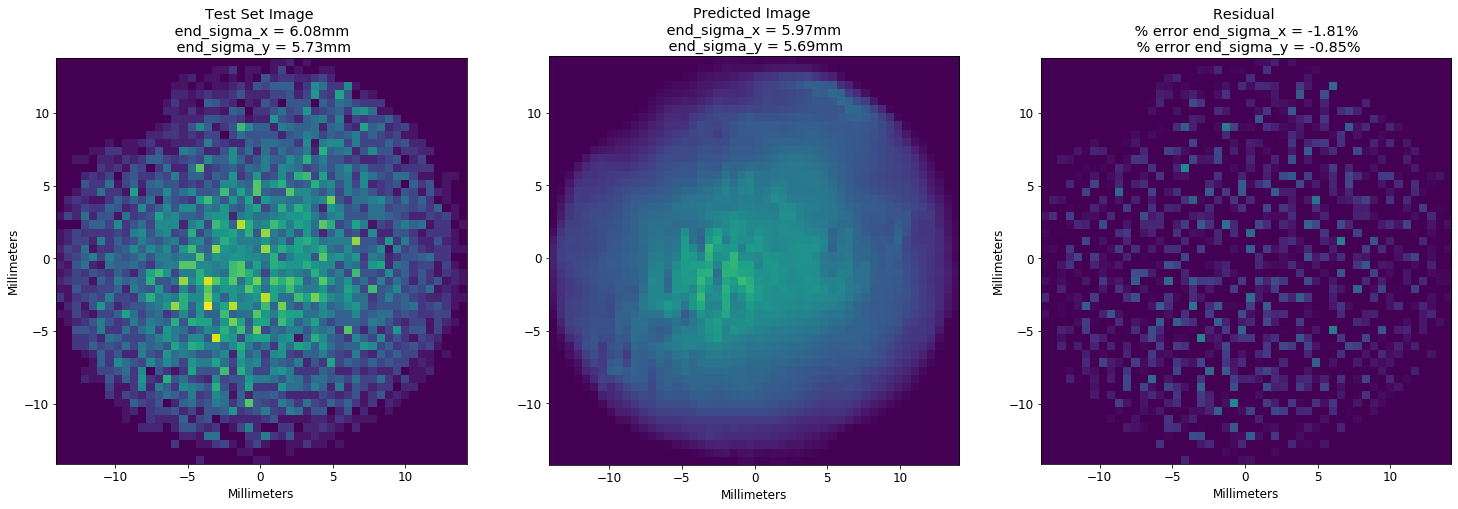

1765


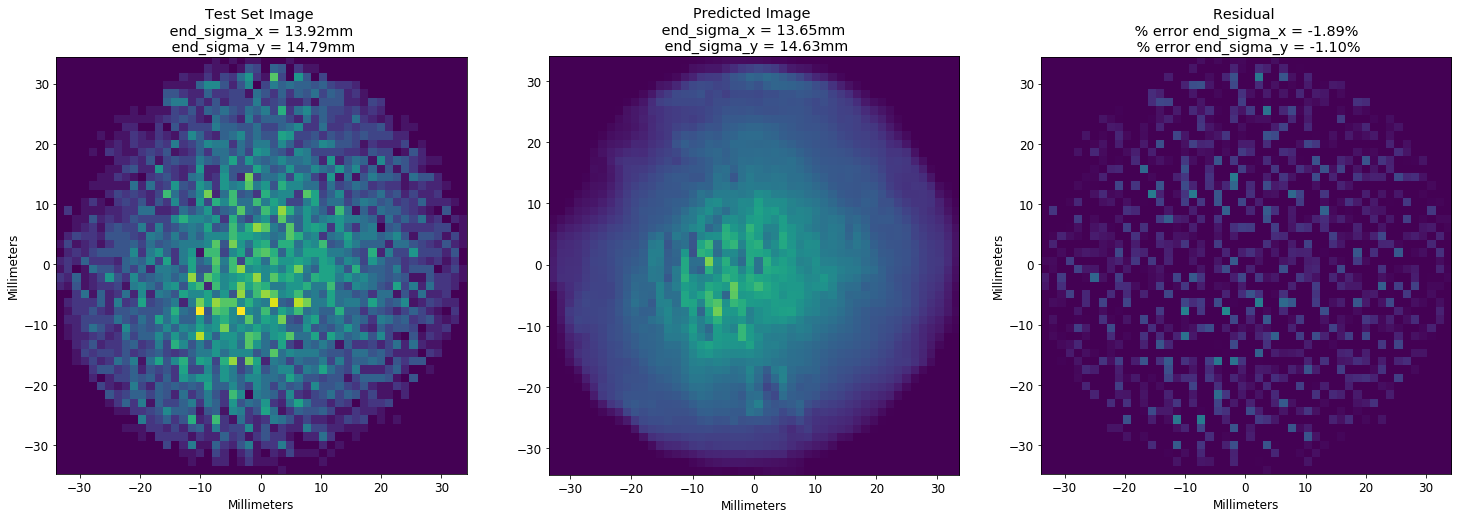

1967


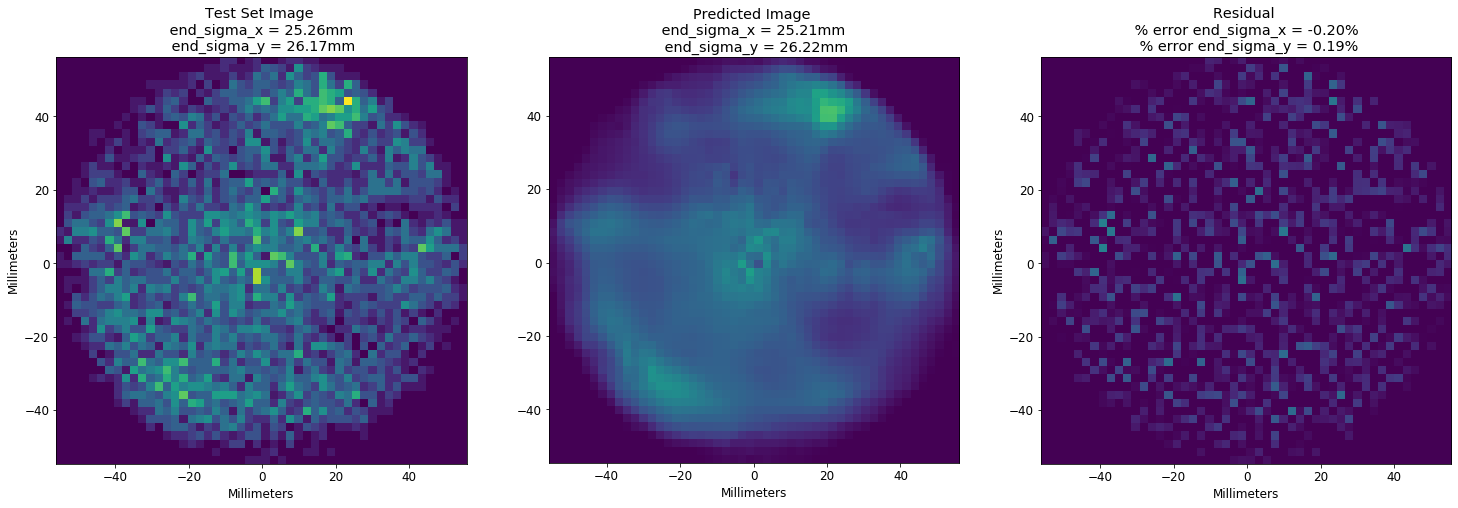

5067


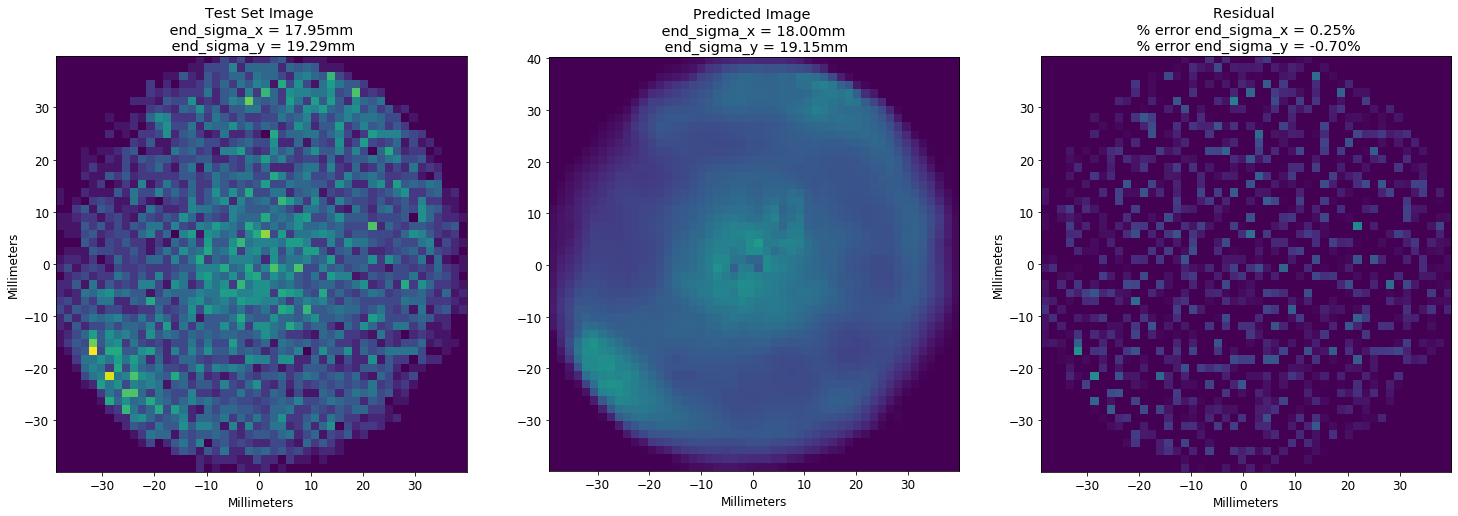

In [40]:
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 12}
import matplotlib
matplotlib.rc('font', **font)
for i in range(10):
    ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])
    print(ind)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,12))
    #fig.suptitle('Sig_x = {:.2f} mm, Phi(1) = {:.2f} degrees, Charge = {:.2f} pC, Max B Solenoid = {:.2f} T'.format(X_unscale_test_scalar[ind,0], X_unscale_test_scalar[ind,2],X_unscale_test_scalar[ind,3],X_unscale_test_scalar[ind,1] )
    
    im = ax1.imshow(Y_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
    ax1.set_xlabel('Millimeters')
    ax1.set_ylabel('Millimeters')
    ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
    ax2.set_xlabel('Millimeters')
    ax1.set_ylabel('Millimeters')
    
    
    res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
    ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
    yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
    ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
    ax3.set_xlabel('Millimeters')
    ax3.set_ylabel('Millimeters')
    plt.show()


In [33]:
# font = {'family' : 'sans-serif',
#         'weight' : 'regular',
#         'size'   : 10}
# import matplotlib
# matplotlib.rc('font', **font)
# for i in range(3):
#     ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])
#     print(ind)
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,12))
#     #fig.suptitle('Sig_x = {:.2f} mm, Phi(1) = {:.2f} degrees, Charge = {:.2f} pC, Max B Solenoid = {:.2f} T'.format(X_unscale_test_scalar[ind,0], X_unscale_test_scalar[ind,2],X_unscale_test_scalar[ind,3],X_unscale_test_scalar[ind,1] )
    
#     im = ax1.imshow(Y_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
#     ax1.set_xlabel('millimeters')
#     ax1.set_ylabel('millimeters')
#     ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
#     ax2.set_xlabel('millimeters')
#     ax1.set_ylabel('millimeters')
    
    
#     res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
#     ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
#     yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
#     ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
#     ax3.set_xlabel('millimeters')
#     ax3.set_ylabel('millimeters')
#     plt.colorbar(im, ax = ax1, orientation='vertical')
#     plt.show()
# #     print(ind)
# #     print(np.max(Y_unscale_test_img[ind]))
# #     print(np.max(Y_unscale_pred_img[ind]))
# #     print(np.max(res))

# # plt.title("sigma_x = {:.3f}, sigma_y = {:.3f}, x_err = {:.3f}, y_err = {:.3f}".format(xgauss_fit[2]*resolution*1E-3, ygauss_fit[2]*resolution*1E-3, xerr[2]*resolution*1E-3, yerr[2]*resolution*1E-3))

656


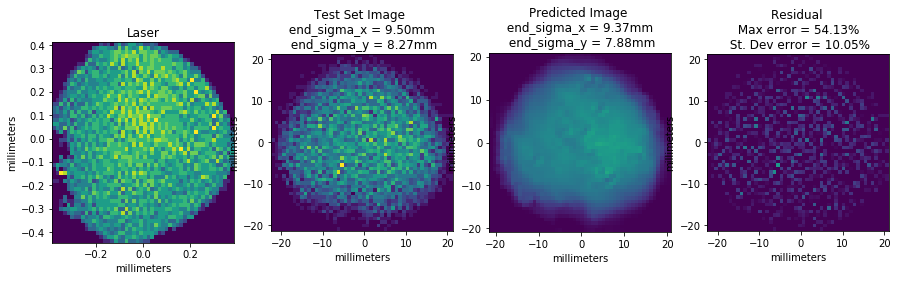

17.0
(2500,)


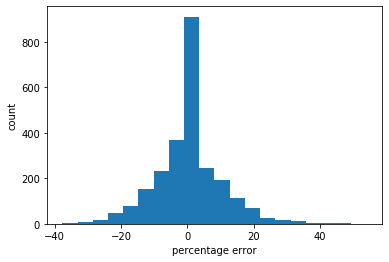

6225


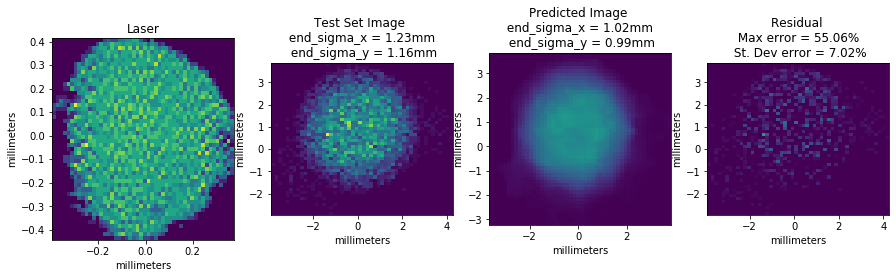

31.0
(2500,)


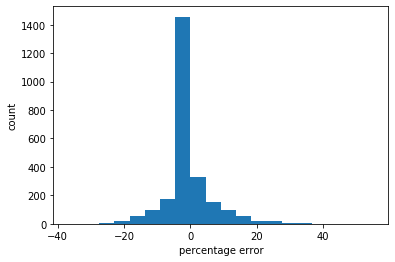

1650


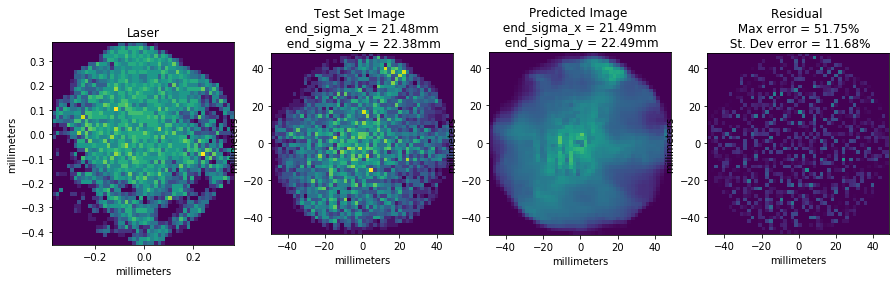

16.0
(2500,)


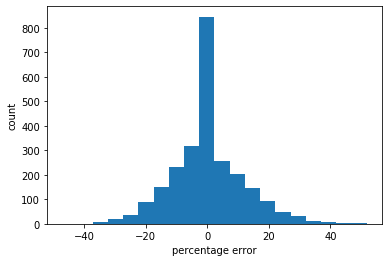

In [41]:
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 10}
import matplotlib
matplotlib.rc('font', **font)
for i in range(3):
    ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])
    print(ind)
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize = (15,12))
    #fig.suptitle('Sig_x = {:.2f} mm, Phi(1) = {:.2f} degrees, Charge = {:.2f} pC, Max B Solenoid = {:.2f} T'.format(X_unscale_test_scalar[ind,0], X_unscale_test_scalar[ind,2],X_unscale_test_scalar[ind,3],X_unscale_test_scalar[ind,1] ))
    #print(X_unscale_test_scalar[ind,0:scalar_variables+4])
    #print(X_test_s[ind,0:scalar_variables+4])
    ax0.imshow(X_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(X_unscale_test_img[ind].reshape(50,50)), origin = "upper", extent = X_unscale_test_scalar[ind,scalar_variables:scalar_variables+4]*1E3)
    ax0.set_title("Laser")
    ax0.set_xlabel('millimeters')
    ax0.set_ylabel('millimeters')
    
    ax1.imshow(Y_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
    ax1.set_xlabel('millimeters')
    ax1.set_ylabel('millimeters')
    ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
    ax2.set_xlabel('millimeters')
    ax2.set_ylabel('millimeters')
    
    res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
    max_res = 100*np.max(res.flatten())/np.max(Y_unscale_test_img[ind].flatten())
    std_res = 100*np.std(res.flatten()/np.max(Y_unscale_test_img[ind].flatten()))
    ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
    yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
    ax3.set_title("Residual \n Max error = {:.2f}% \n St. Dev error = {:.2f}%".format(max_res, std_res))
    #ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
    ax3.set_xlabel('millimeters')
    ax3.set_ylabel('millimeters')
    plt.show()

    print(np.max(Y_unscale_test_img[ind].reshape(50,50)))
    print(np.shape(100*res.flatten()/np.max(Y_unscale_test_img[ind].flatten())))
    plt.hist(100*res.flatten()/np.max(Y_unscale_test_img[ind].flatten()), bins = 20)
    plt.xlabel("percentage error")
    plt.ylabel("count")
    plt.show()
#     res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
#     ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
#     yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
#     ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
#     ax3.set_xlabel('millimeters')
#     ax3.set_ylabel('millimeters')
#     plt.show()


In [87]:
def blur(I, n = 1):
    I = I.copy()
    for _ in range(n):
        for i in range(1, I.shape[0]-1):
            for j in range(1, I.shape[1]-1):
                I[i,j] = (4*I[i,j] + I[i+1,j] + I[i-1,j] + I[i,j-1] + I[i,j+1])/8.0
    return I
    

3336


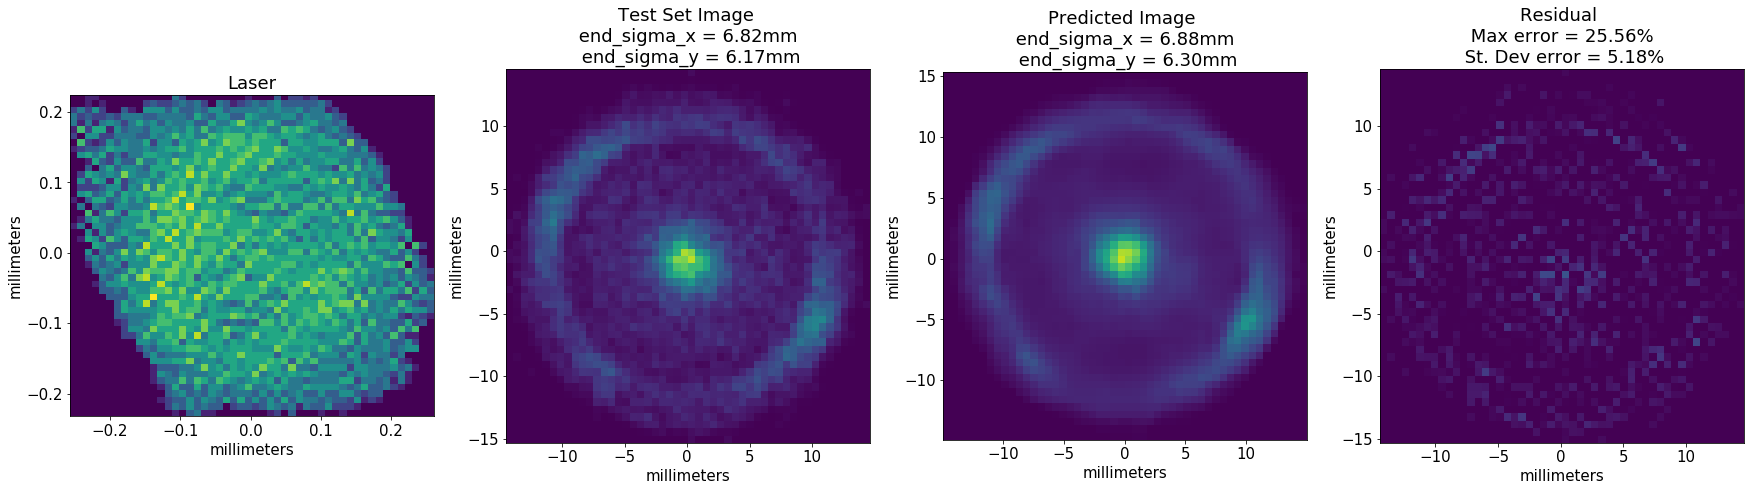

35.0
(2500,)


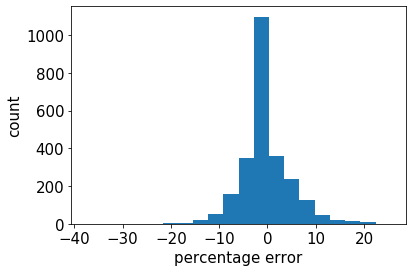

141


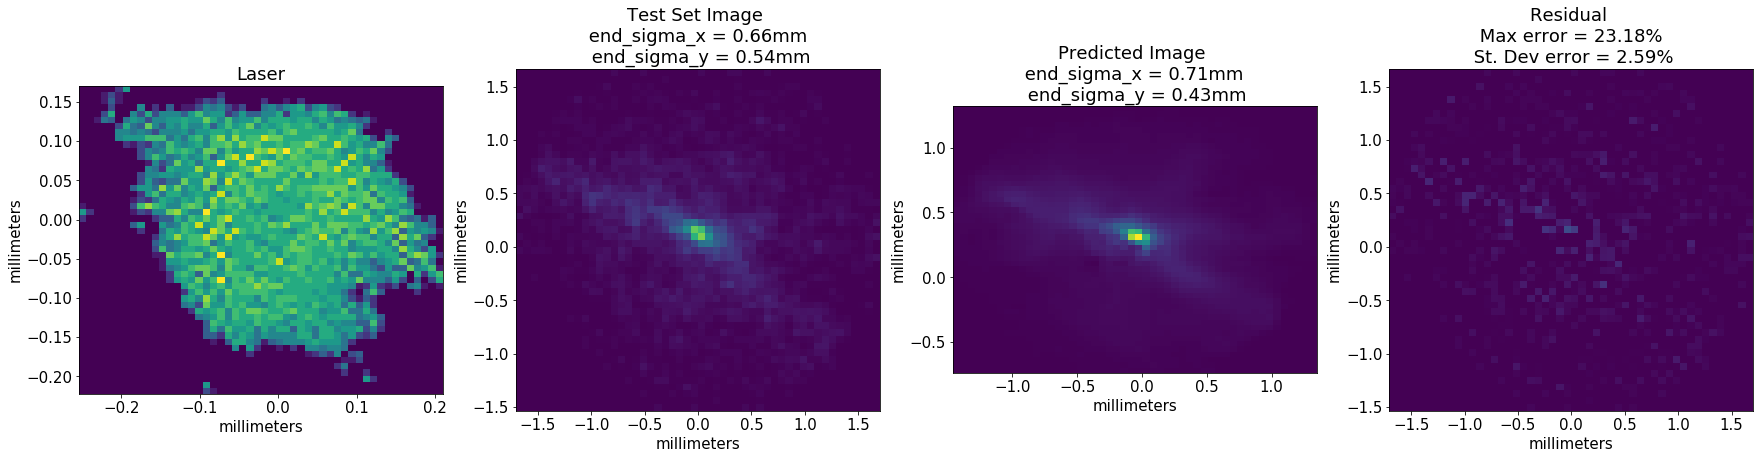

44.0
(2500,)


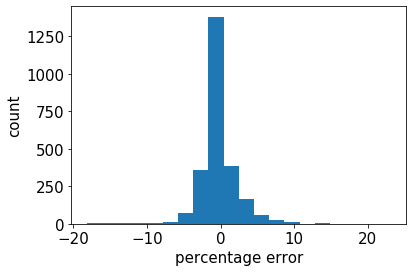

7300


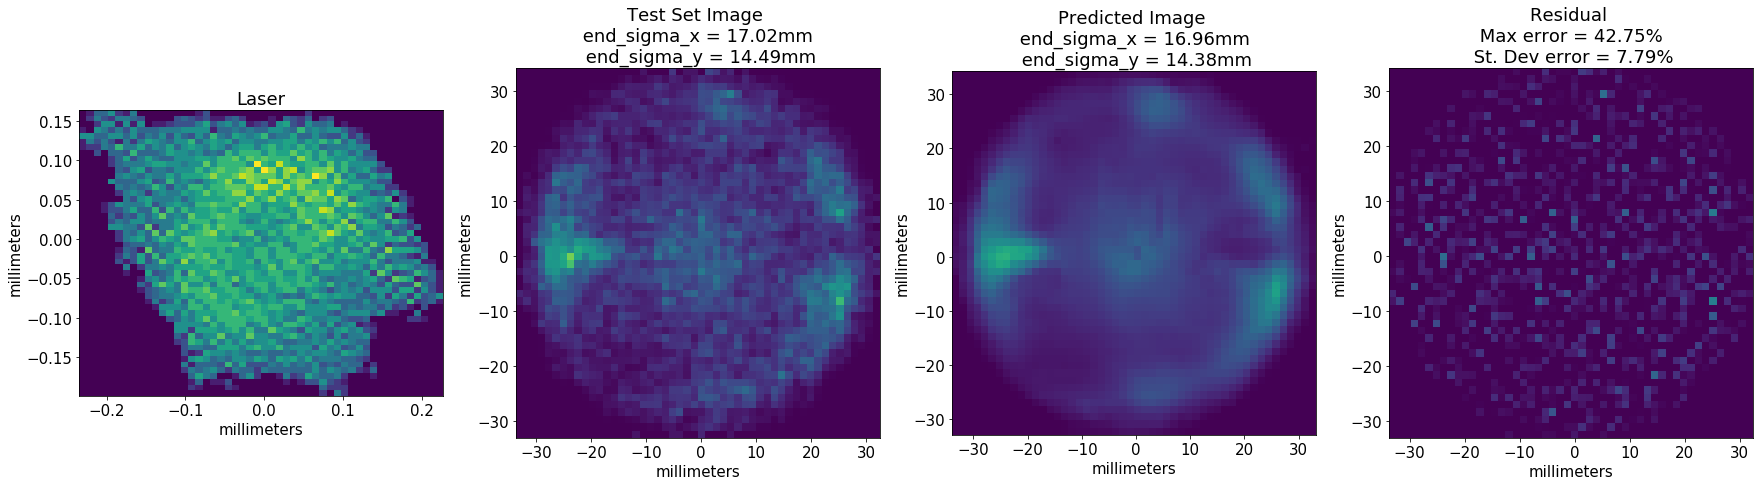

19.0
(2500,)


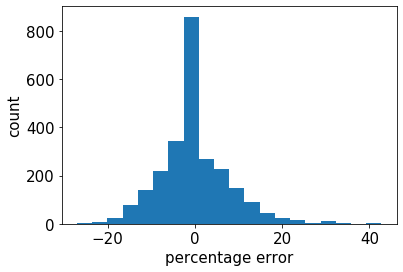

In [88]:
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)
for i in range(3):
    ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])
    print(ind)
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize = (30,15))

    ax0.imshow(X_unscale_test_img[ind].reshape(50,50), vmin = np.min(X_unscale_test_img[ind].reshape(50,50)), vmax = np.max(X_unscale_test_img[ind].reshape(50,50)), origin = "upper", extent = X_unscale_test_scalar[ind,scalar_variables:scalar_variables+4]*1E3)
    ax0.set_title("Laser")
    ax0.set_xlabel('millimeters')
    ax0.set_ylabel('millimeters')
    
    image = Y_unscale_test_img[ind].reshape(50,50)
    test = blur(image)
    
    ax1.imshow(test, vmin = np.min(X_unscale_test_img[ind].reshape(50,50)), vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
    ax1.set_xlabel('millimeters')
    ax1.set_ylabel('millimeters')

    ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = np.min(X_unscale_test_img[ind].reshape(50,50)), vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
    ax2.set_xlabel('millimeters')
    ax2.set_ylabel('millimeters')
    
    res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
    max_res = 100*np.max(res.flatten())/np.max(Y_unscale_test_img[ind].flatten())
    std_res = 100*np.std(res.flatten()/np.max(Y_unscale_test_img[ind].flatten()))
    ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
    yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
    ax3.set_title("Residual \n Max error = {:.2f}% \n St. Dev error = {:.2f}%".format(max_res, std_res))
    #ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
    ax3.set_xlabel('millimeters')
    ax3.set_ylabel('millimeters')
    plt.show()

    print(np.max(Y_unscale_test_img[ind].reshape(50,50)))
    print(np.shape(100*res.flatten()/np.max(Y_unscale_test_img[ind].flatten())))
    plt.hist(100*res.flatten()/np.max(Y_unscale_test_img[ind].flatten()), bins = 20)
    plt.xlabel("percentage error")
    plt.ylabel("count")
    plt.show()
#     res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
#     ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
#     yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
#     ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
#     ax3.set_xlabel('millimeters')
#     ax3.set_ylabel('millimeters')
#     plt.show()


In [42]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 14}
import matplotlib
matplotlib.rc('font', **font)


def plot_img(img, img_roi, xlabel, ylabel,xunits,yunits,img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,vmin=False,vmax=False):
    
    extent=img_roi
    fig,ax = plt.subplots(nrows=1, ncols=1)
    if vmin:
           ax.imshow(img.reshape(bins,bins), extent=extent,cmap='viridis',vmin=vmin,vmax=vmax)
    else:
        ax.imshow(img.reshape(bins,bins), extent=extent,cmap='viridis')
    rect = ax.patch
    rect.set_facecolor("#440154FF")
    #ax.set_aspect('auto')
    ax.set_xlim((img_lim_xmin,img_lim_xmax))
    ax.set_ylim((img_lim_ymin,img_lim_ymax))
    plt.xlabel(xlabel+' '+xunits)
    plt.ylabel(ylabel+' '+yunits)
    
def get_img_lim_ranges(img_roi):
    img_lim_xmax = np.max(img_roi,axis=0)[1]
    img_lim_ymax = np.max(img_roi,axis=0)[3]
    
    img_lim_xmin = np.min(img_roi,axis=0)[0]
    img_lim_ymin = np.min(img_roi,axis=0)[2]
    return img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax

def plot_img_row(img, img_roi, ax,a,title,xlabel,ylabel,xuntis,yunits,img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,vmin=False,vmax=False,axscale=True):
    
    extent=tuple(img_roi)
    
    if vmin:
        img=ax[a].imshow(img.reshape(bins,bins), extent=extent,cmap='viridis',vmin=vmin,vmax=vmax)
    else:
        img=ax[a].imshow(img.reshape(bins,bins), extent=extent,cmap='viridis')
    
    rect = ax[a].patch
    rect.set_facecolor("#440154FF")
    if axscale==True:
        ax[a].set_xlim((img_lim_xmin,img_lim_xmax))
        ax[a].set_ylim((img_lim_ymin,img_lim_ymax))
        ax[a].set_aspect('equal')
    #plt.xlabel(xlabel+' '+xunits)
    #plt.ylabel(ylabel+' '+yunits)
    ax[a].set_aspect('equal')
    
    plt.tight_layout()
    
    return ax,img



def x_projection(image, axis=0, subtract_baseline=True):
    """Expects ndarray, return x projection"""
    proj = np.sum(image, axis=0)
    if subtract_baseline:
        return proj - min(proj)

    return proj

def y_projection(image, subtract_baseline=True):
    """Expects ndarray, return y projection"""
    proj = np.sum(image, axis=1)
    if subtract_baseline:
        return proj - min(proj)
    
    return proj

In [43]:
inds = np.where(Y_unscale_test_scalar[:,scalar_outputs]*1E3 > -25)


y_pred_img_roi = Y_unscale_pred_scalar[inds[0],scalar_outputs:scalar_outputs+4]*1E3
y_test_img_roi = Y_unscale_test_scalar[inds[0],scalar_outputs:scalar_outputs+4]*1E3

y_pred_img = Y_unscale_pred_img[inds]
y_test_img = Y_unscale_test_img[inds]

X_img = X_unscale_test_img[inds[0]]
X_roi = X_unscale_test_scalar[inds[0], scalar_variables:scalar_variables+4]*1E3

# plot with real limits
img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax = get_img_lim_ranges(y_test_img_roi)
print(img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax)

xlabel, ylabel, xunits, yunits = ["", "", "mm", "mm"]
bins = 50


-24.995853042089998 25.9883968956 -26.637790255860008 26.03366472462


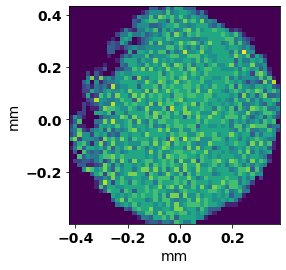

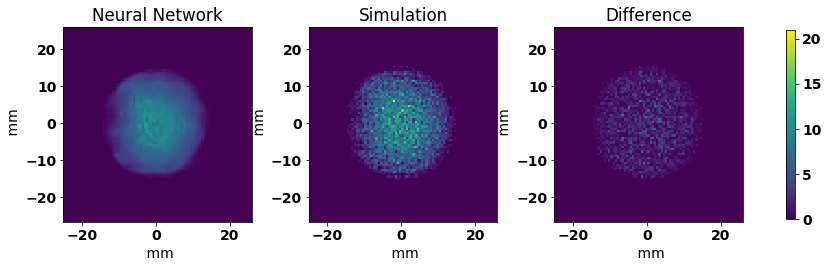

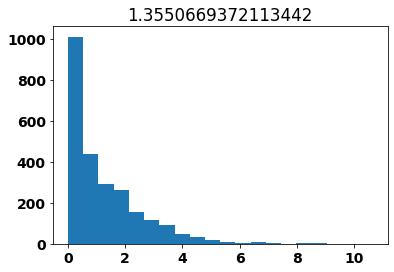

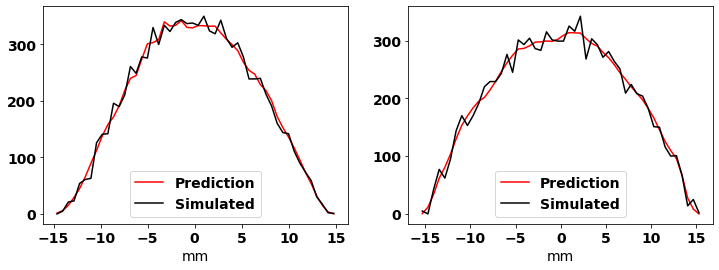

limits predicted mm : [-14.29873705  14.58077412 -15.29490203  15.04820492]
limits true mm      : [-14.62719154  14.77909472 -15.3036064   15.27382789]
------------------------------------------------------------------------
------------------------------------------------------------------------


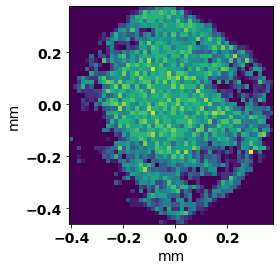

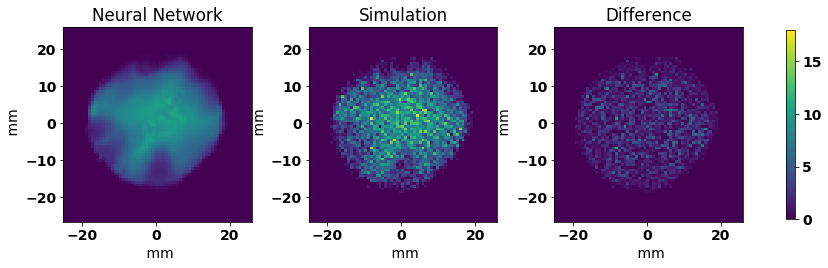

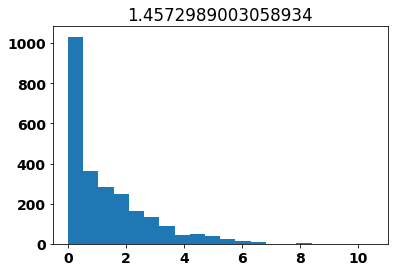

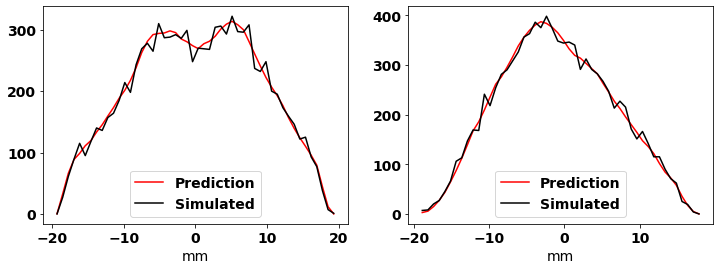

limits predicted mm : [-19.19739693  19.32834461 -18.63394678  18.54577474]
limits true mm      : [-19.33156414  19.31220936 -18.87800868  17.85520596]
------------------------------------------------------------------------
------------------------------------------------------------------------


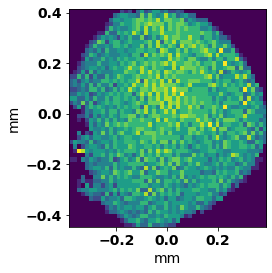

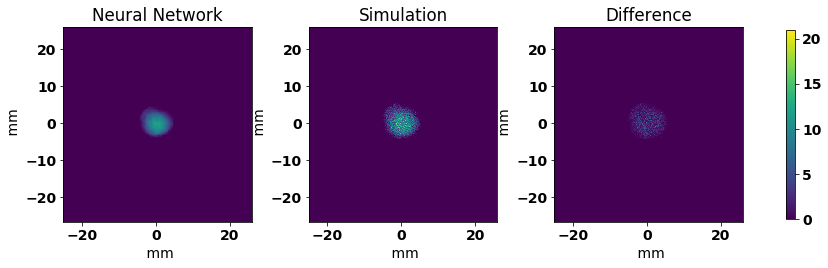

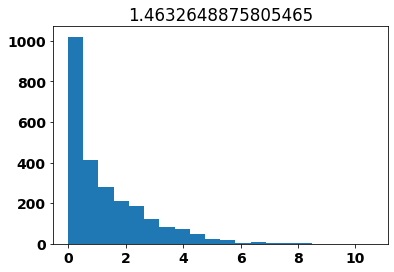

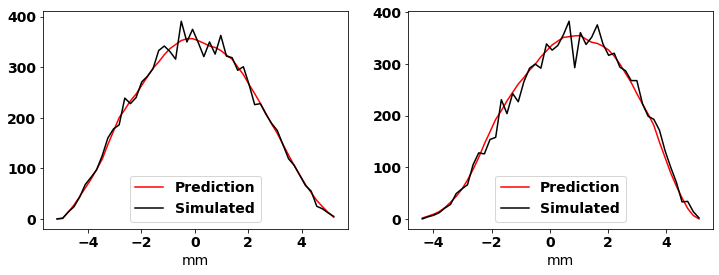

limits predicted mm : [-4.66583669  4.64654947 -4.00321186  4.61237784]
limits true mm      : [-5.16430294  5.20621903 -4.38017229  5.12817878]
------------------------------------------------------------------------
------------------------------------------------------------------------


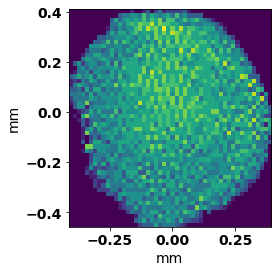

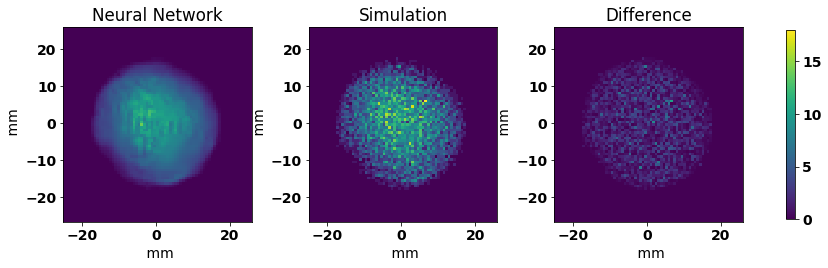

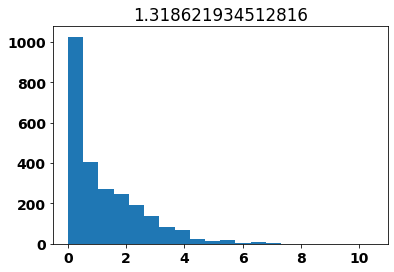

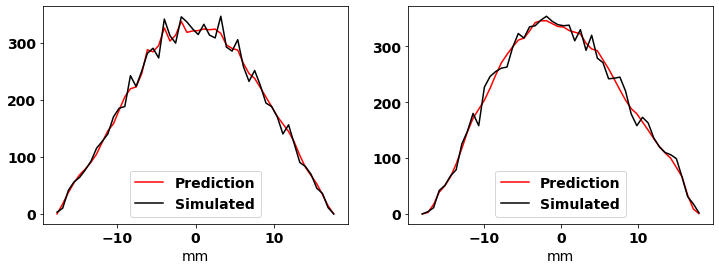

limits predicted mm : [-17.61727035  17.47350954 -18.11544597  17.61955209]
limits true mm      : [-17.54565654  17.50297323 -17.99527171  17.95314632]
------------------------------------------------------------------------
------------------------------------------------------------------------


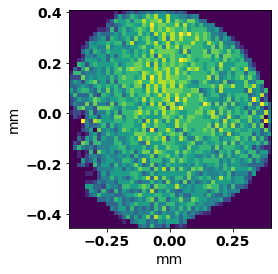

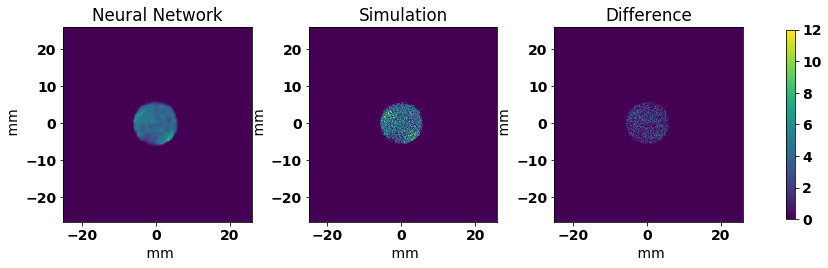

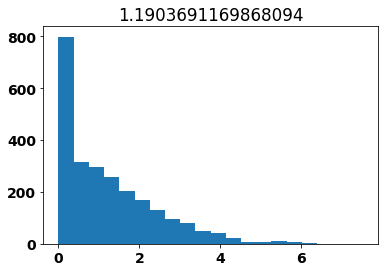

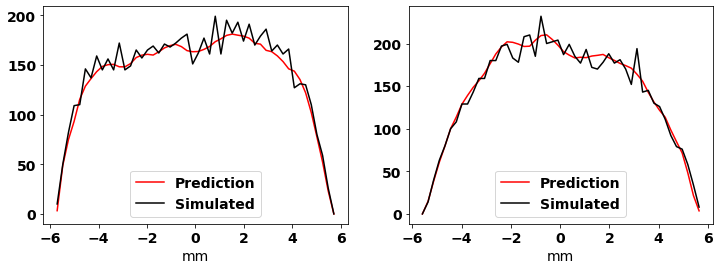

limits predicted mm : [-6.05641305  5.85590536 -6.09514862  6.0303756 ]
limits true mm      : [-5.71456297  5.7205578  -5.5972183   5.64799298]
------------------------------------------------------------------------
------------------------------------------------------------------------


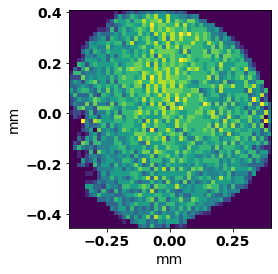

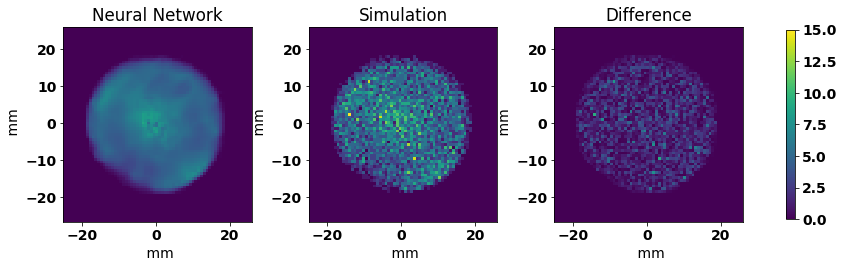

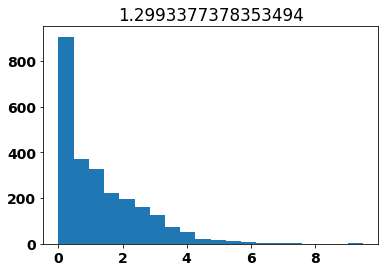

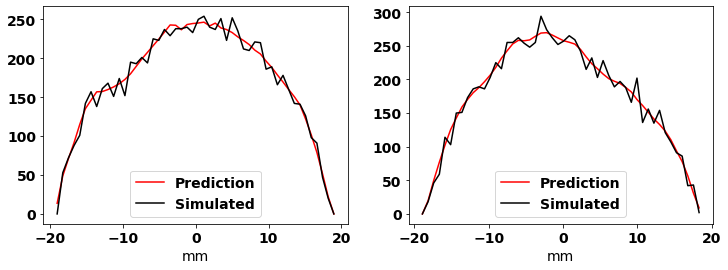

limits predicted mm : [-18.83667707  18.68454739 -19.02937889  18.46073754]
limits true mm      : [-19.05790809  18.97393758 -18.92519359  18.28473576]
------------------------------------------------------------------------
------------------------------------------------------------------------


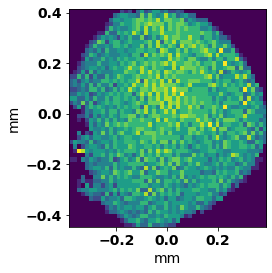

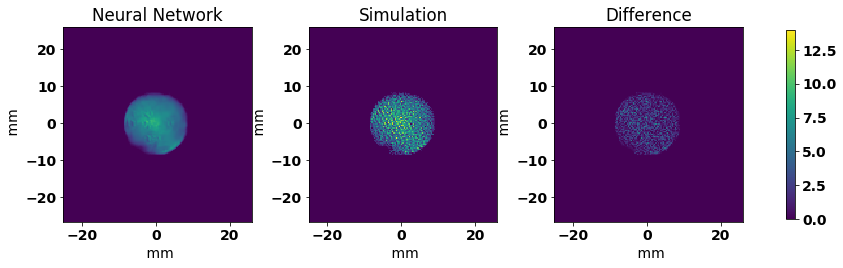

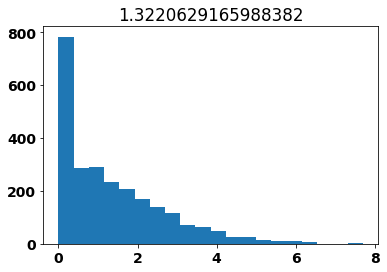

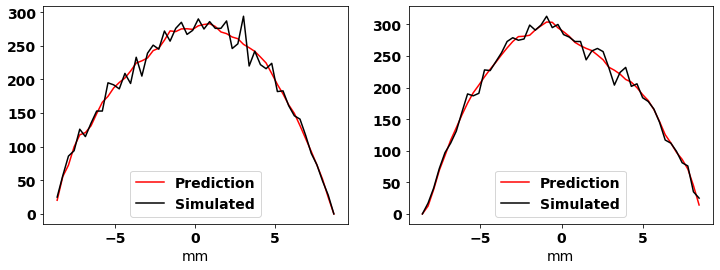

limits predicted mm : [-8.57542455  8.58375803 -8.50045681  8.50107521]
limits true mm      : [-8.60466607  8.70330602 -8.56354924  8.46312571]
------------------------------------------------------------------------
------------------------------------------------------------------------


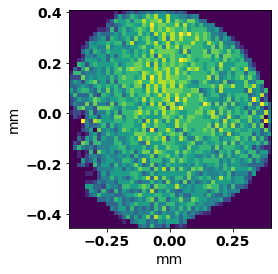

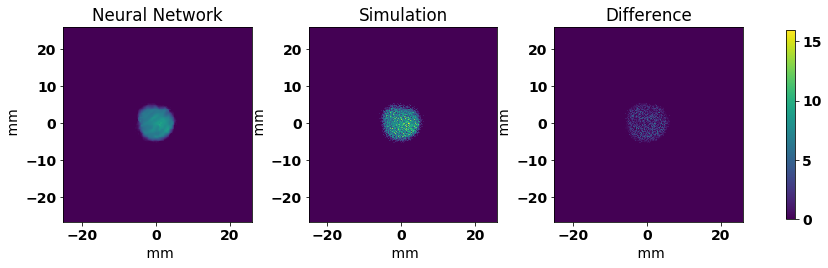

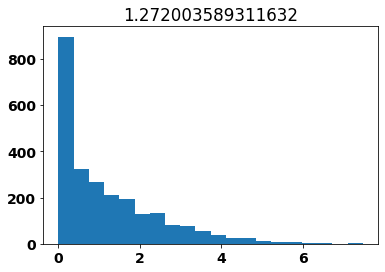

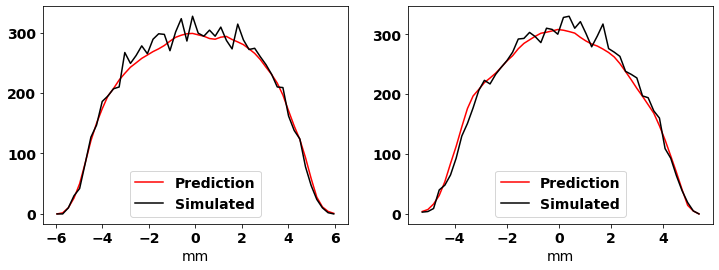

limits predicted mm : [-5.68878651  5.56910736 -5.41169196  5.39305061]
limits true mm      : [-5.95592954  5.95366989 -5.24920626  5.38963504]
------------------------------------------------------------------------
------------------------------------------------------------------------


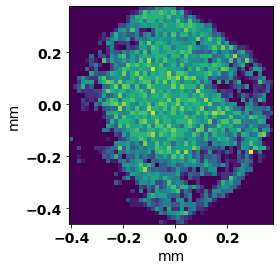

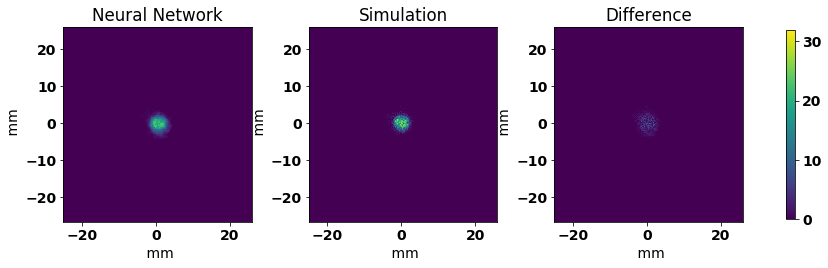

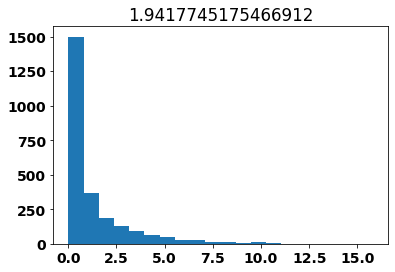

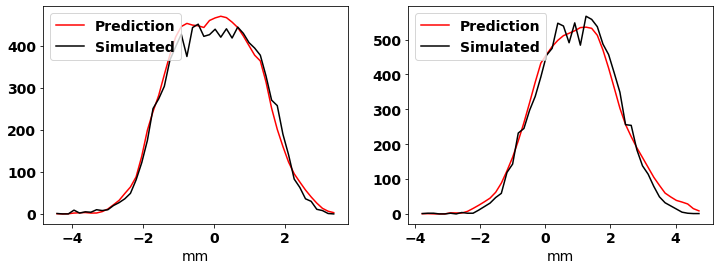

limits predicted mm : [-4.36507165  4.54589212 -4.31414694  4.69875382]
limits true mm      : [-4.42684003  3.39032883 -3.77165284  4.72014723]
------------------------------------------------------------------------
------------------------------------------------------------------------


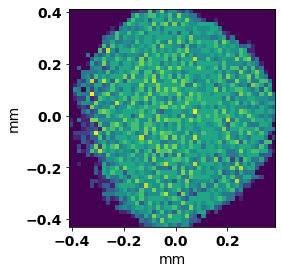

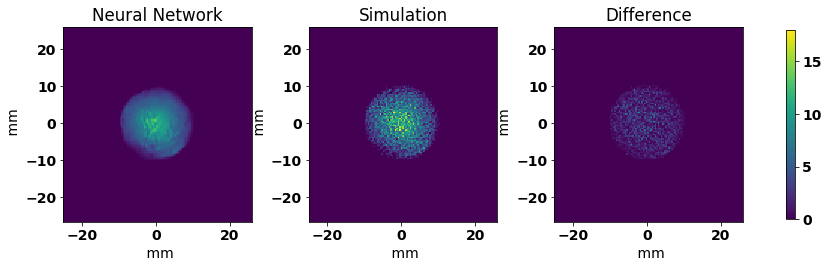

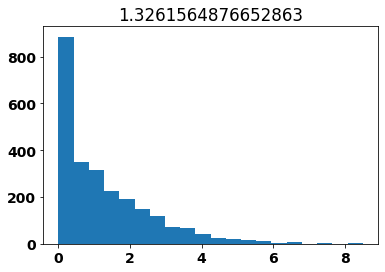

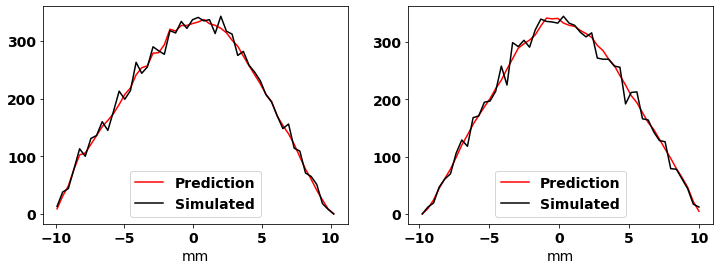

limits predicted mm : [-9.71649587 10.12189034 -9.80113447  9.89560783]
limits true mm      : [-9.9046558  10.22676686 -9.79181322  9.99282235]
------------------------------------------------------------------------
------------------------------------------------------------------------


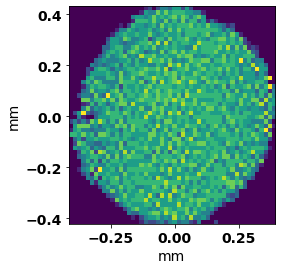

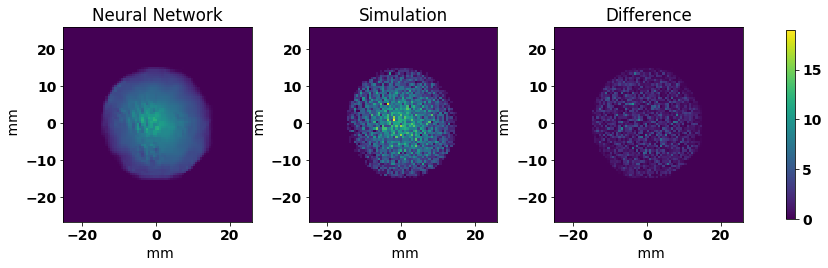

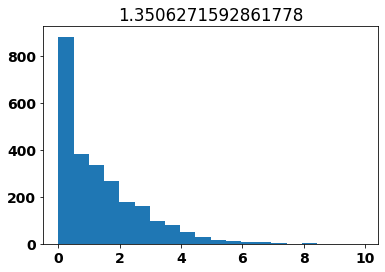

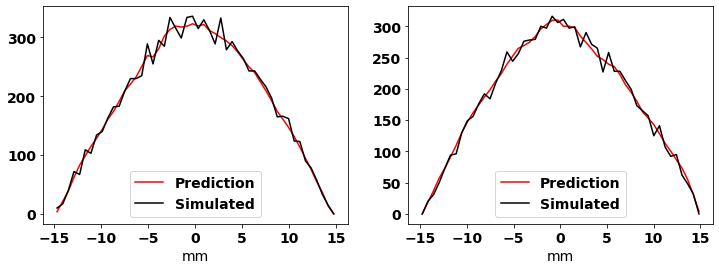

limits predicted mm : [-14.93044943  15.10636508 -15.22495598  15.16506262]
limits true mm      : [-14.7246939   14.76776062 -14.79621396  14.86960252]
------------------------------------------------------------------------
------------------------------------------------------------------------


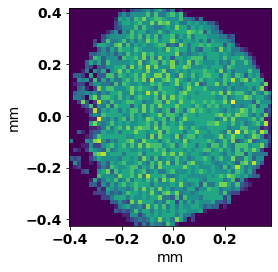

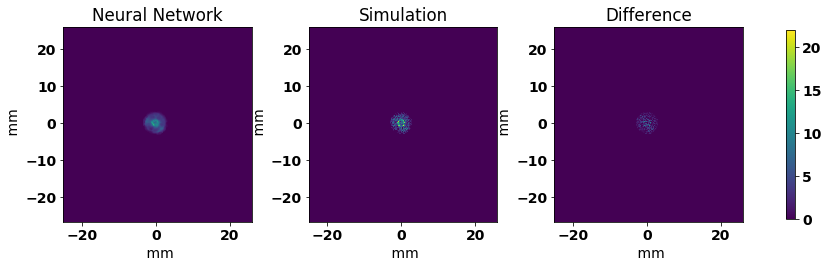

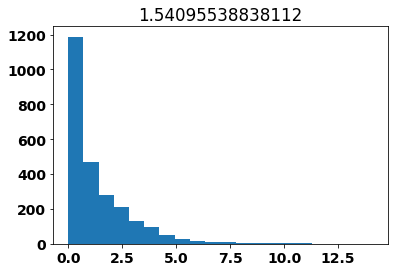

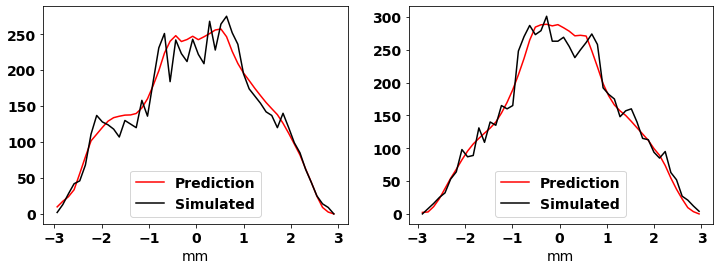

limits predicted mm : [-3.56078148  3.14447749 -3.17378342  3.3089635 ]
limits true mm      : [-2.94028151  2.90502102 -2.89851243  2.94944144]
------------------------------------------------------------------------
------------------------------------------------------------------------


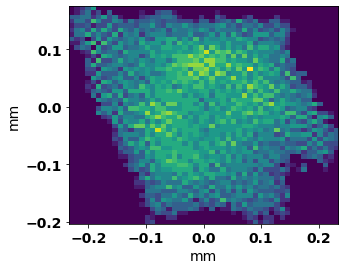

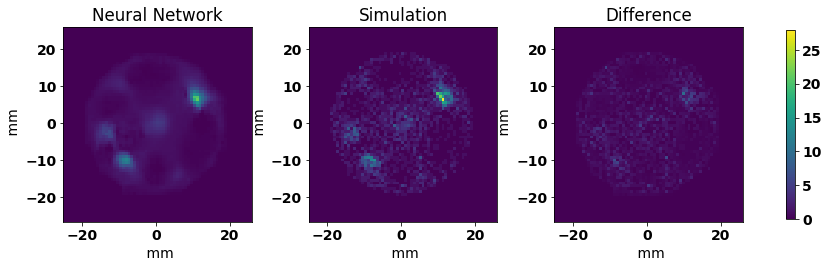

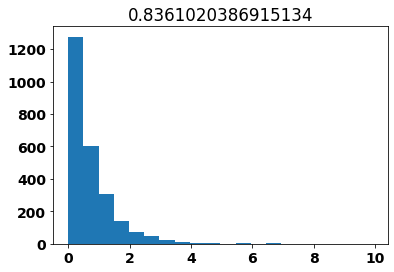

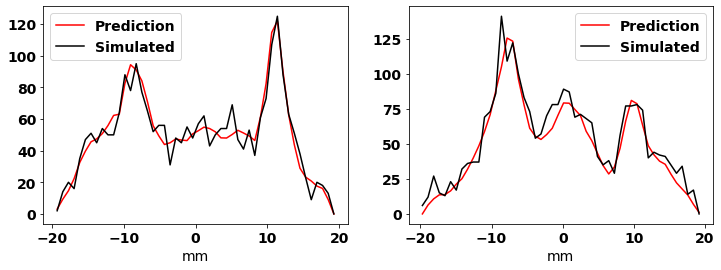

limits predicted mm : [-19.01815087  19.13347468 -19.33959872  18.93089339]
limits true mm      : [-19.28846396  19.24877209 -19.71985442  19.16856837]
------------------------------------------------------------------------
------------------------------------------------------------------------


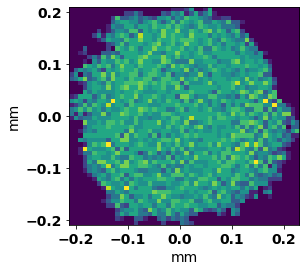

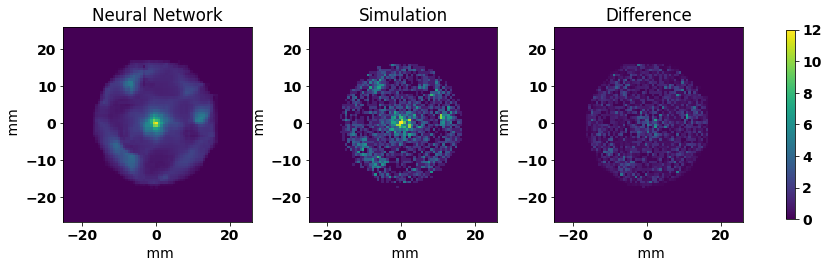

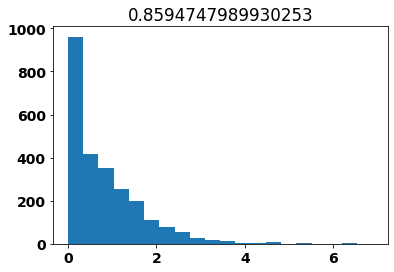

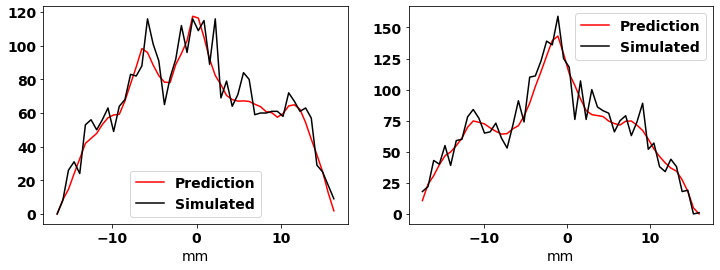

limits predicted mm : [-16.91900939  16.74048416 -17.74203032  16.99890383]
limits true mm      : [-16.57783793  16.32988686 -17.39226328  15.95501192]
------------------------------------------------------------------------
------------------------------------------------------------------------


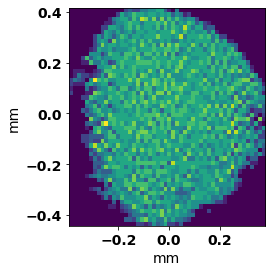

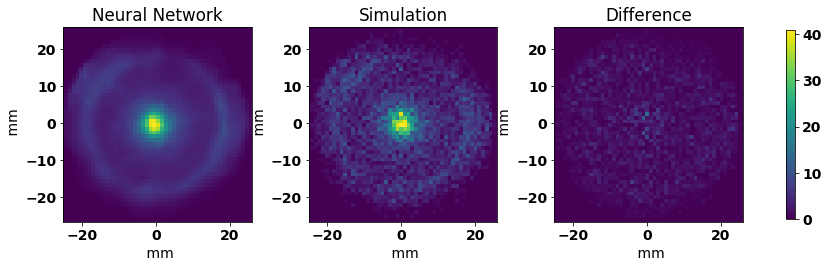

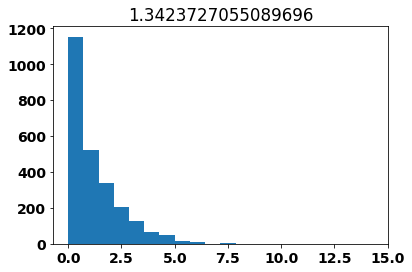

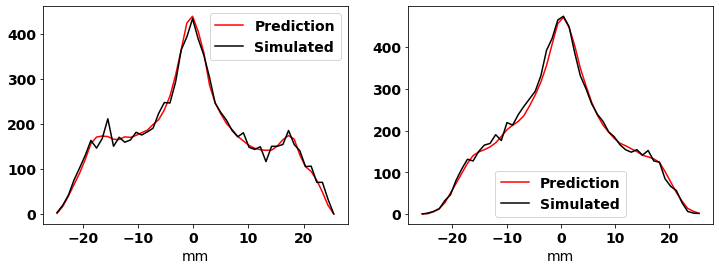

limits predicted mm : [-25.76091886  26.12366527 -25.30843765  25.44653229]
limits true mm      : [-24.67396183  25.43752522 -25.57592133  25.47696767]
------------------------------------------------------------------------
------------------------------------------------------------------------


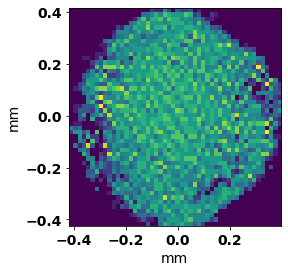

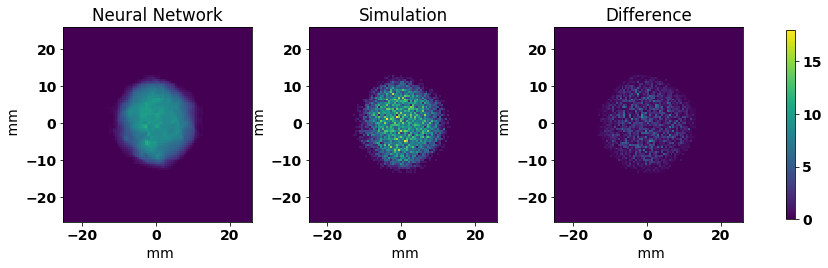

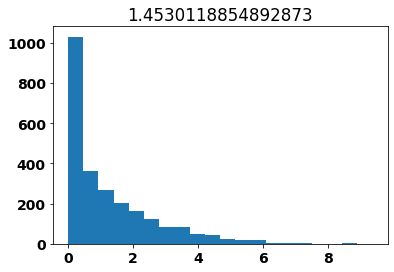

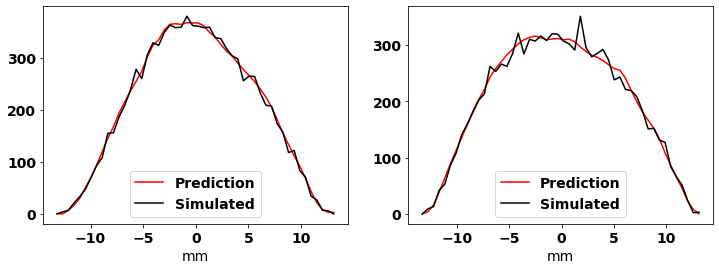

limits predicted mm : [-12.7614364   12.39766274 -12.7069056   12.77858112]
limits true mm      : [-13.17925555  13.09944993 -13.33533209  13.13471995]
------------------------------------------------------------------------
------------------------------------------------------------------------


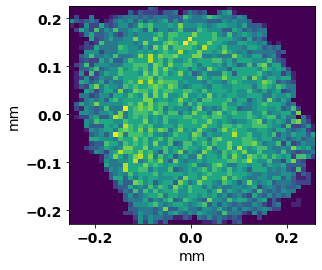

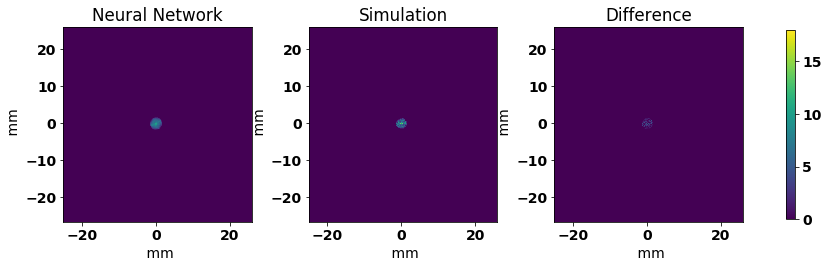

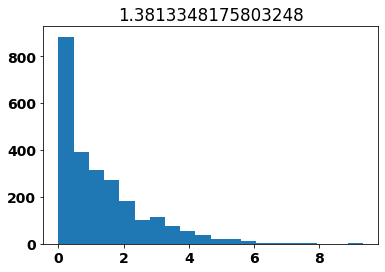

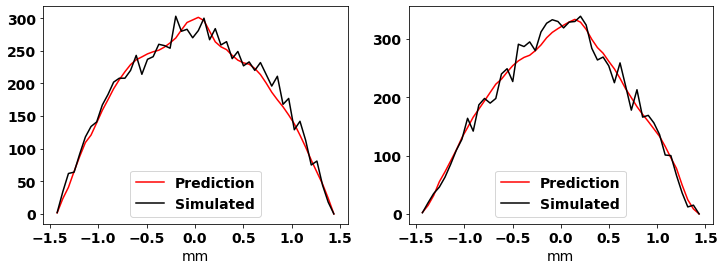

limits predicted mm : [-1.62202865  1.55808032 -1.83724612  1.43858837]
limits true mm      : [-1.42344543  1.43618289 -1.43540161  1.43375679]
------------------------------------------------------------------------
------------------------------------------------------------------------


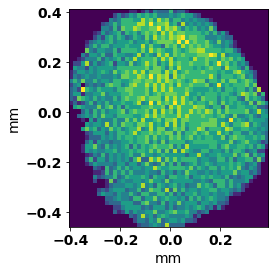

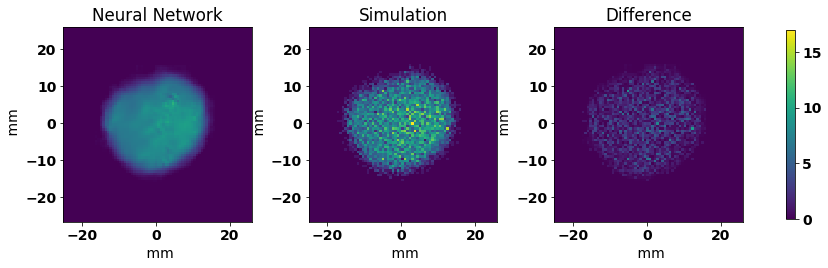

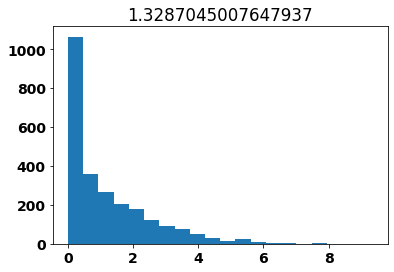

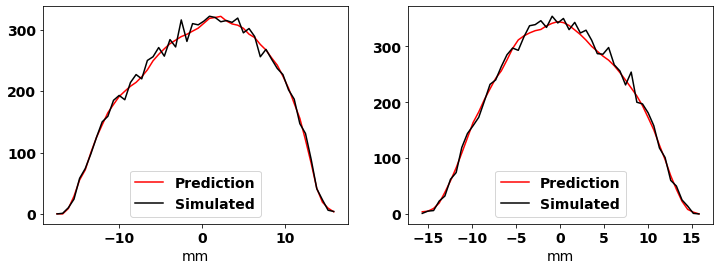

limits predicted mm : [-16.41418785  15.81035368 -15.75800031  15.79026878]
limits true mm      : [-17.51439421  15.8274268  -15.68554755  15.83317666]
------------------------------------------------------------------------
------------------------------------------------------------------------


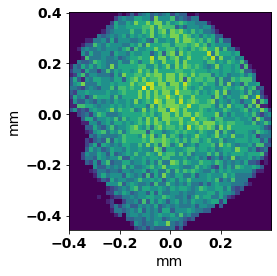

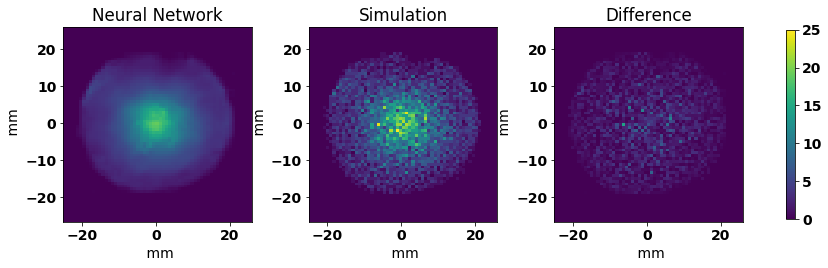

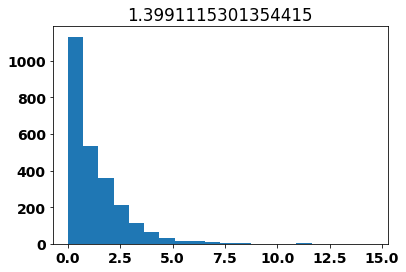

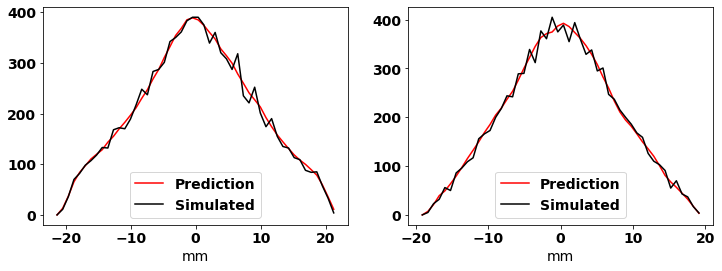

limits predicted mm : [-21.56788111  21.24727517 -18.95714551  19.15207505]
limits true mm      : [-21.31490343  21.22236021 -19.12134497  19.14299238]
------------------------------------------------------------------------
------------------------------------------------------------------------


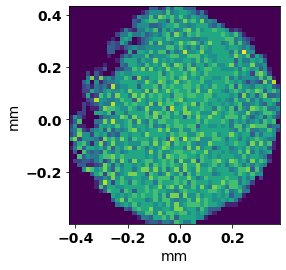

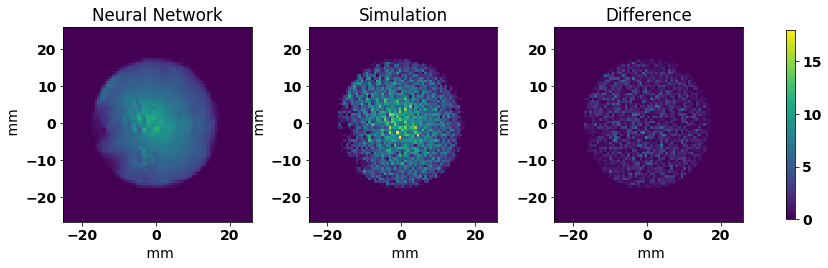

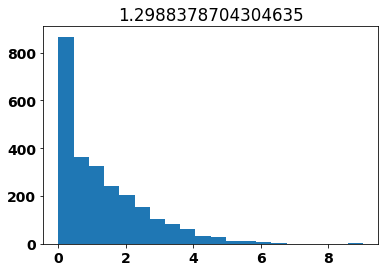

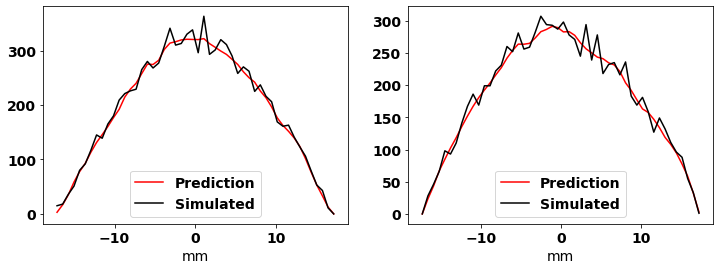

limits predicted mm : [-17.14016497  17.3868034  -17.54517108  17.50475354]
limits true mm      : [-17.13260354  17.20327267 -17.42998385  17.29787099]
------------------------------------------------------------------------
------------------------------------------------------------------------


In [44]:


for i in range(0,20):

    ind = np.random.randint(np.shape(y_test_img )[0])
    plt.imshow(X_img[ind].reshape(50,50), extent = X_roi[ind, :])
    plt.xlabel('mm')
    plt.ylabel('mm')
    plt.show()
    vmint = np.min(y_test_img[ind,:])
    vmaxt = np.max(y_test_img[ind,:])
    y_test_img_diffs = np.abs(y_test_img[ind,:]-y_pred_img[ind,:])
    
    fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(13, 7))
    titles = ['Neural Network', 'Simulation', 'Difference']
    
    vm =1e-55
    axs,im=plot_img_row(y_pred_img[ind,:],
                        y_pred_img_roi[ind,:],
                        axs, 0, 
                        titles[0], xlabel, ylabel, xunits, yunits, 
                        img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,
                        vmin = vm,vmax = vmaxt)
    
    axs,im=plot_img_row(y_test_img[ind,:],
                        y_test_img_roi[ind,:],
                        axs, 1, 
                        titles[1], xlabel, ylabel, xunits, yunits, 
                        img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,
                        vmin = vm,vmax = vmaxt)
    
    axs,im=plot_img_row(y_test_img_diffs,
                        y_test_img_roi[ind,:],
                        axs, 2, 
                        titles[2], xlabel, ylabel, xunits, yunits, 
                        img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,
                        vmin = vm,vmax = vmaxt)
    
    axs[0].title.set_text(titles[0])
    axs[1].title.set_text(titles[1])
    axs[2].title.set_text(titles[2])

    axs[0].set_xlabel(xlabel+' '+xunits)
    axs[0].set_ylabel(ylabel+' '+yunits)

    axs[1].set_xlabel(xlabel+' '+xunits)
    axs[1].set_ylabel(ylabel+' '+yunits)

    axs[2].set_xlabel(xlabel+' '+xunits)
    axs[2].set_ylabel(ylabel+' '+yunits)
    fig.tight_layout()
    fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.4)
    plt.show()
    
    plt.hist(y_test_img_diffs.flatten(), bins = 20)
    plt.title(np.std(y_test_img_diffs.flatten()))
    plt.show()
    
    ## x projections
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
    
    xproj_pred = x_projection(y_pred_img[ind,:].reshape(bins,bins))
    xproj_test = x_projection(y_test_img[ind,:].reshape(bins,bins))
    ax[0].plot(np.linspace(y_test_img_roi[ind,0], y_test_img_roi[ind,1], 50), xproj_pred, 'r', label = "Prediction")
    ax[0].plot(np.linspace(y_test_img_roi[ind,0], y_test_img_roi[ind,1], 50), xproj_test, 'k', label = "Simulated")
    ax[0].set_xlabel("mm")
    ax[0].legend()
    
    yproj_pred = y_projection(y_pred_img[ind,:].reshape(bins,bins))
    yproj_test = y_projection(y_test_img[ind,:].reshape(bins,bins))
    ax[1].plot(np.linspace(y_test_img_roi[ind,2], y_test_img_roi[ind,3], 50), yproj_pred, 'r', label = "Prediction")
    ax[1].plot(np.linspace(y_test_img_roi[ind,2], y_test_img_roi[ind,3], 50), yproj_test, 'k', label = "Simulated")
    ax[1].set_xlabel("mm")
    ax[1].legend()
    plt.show()

    print('limits predicted '+str(xunits)+' :', y_pred_img_roi[ind,:])
    print('limits true '+ str(yunits)+'      :', y_test_img_roi[ind,:])
    print('------------------------------------------------------------------------')
    print('------------------------------------------------------------------------')

In [45]:
pererr = np.mean(100*np.abs(Y_unscale_test_scalar - Y_unscale_pred_scalar)/Y_unscale_test_scalar, axis = 0)

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [46]:
mse = np.mean((Y_unscale_test_scalar - Y_unscale_pred_scalar)**2, axis = 0)

In [47]:
for i, name in enumerate(output_names):
    print(name, mse[i])

end_core_emit_95percent_x 8.325039175935108e-15
end_core_emit_95percent_y 5.803403079370001e-15
end_core_emit_95percent_z 1.651162526512137e-14
end_mean_kinetic_energy 2623.848799631134
end_mean_x 4.061897473378989e-10
end_mean_y 4.075983506808014e-10
end_n_particle_loss 1704.7241222670825
end_norm_emit_x 1.2161770453813294e-14
end_norm_emit_y 9.541720337095191e-15
end_norm_emit_z 0.02793715539716986
end_sigma_x 2.66830409214057e-08
end_sigma_xp 3.103488734688443e-08
end_sigma_y 1.9406251820869644e-08
end_sigma_yp 2.459652717906589e-08
end_sigma_z 2.9656882513564405e-10
end_total_charge 7.12617505540768e-25
out_xmin 2.650349413949045e-07
out_xmax 2.7110096232293304e-07
out_ymin 2.5688274856021443e-07
out_ymax 3.2843399235320836e-07


In [48]:
for i, name in enumerate(output_names):
    print(name, pererr[i])

end_core_emit_95percent_x 4.398161273634296
end_core_emit_95percent_y 4.434048120244986
end_core_emit_95percent_z 2.5712140265317953
end_mean_kinetic_energy 0.005485802582859115
end_mean_x -27.22298552138864
end_mean_y -239.82770589811497
end_n_particle_loss inf
end_norm_emit_x 4.190290175587491
end_norm_emit_y 4.05178124994226
end_norm_emit_z 2.358592921459378
end_sigma_x 2.228755404419209
end_sigma_xp 4.061694789556798
end_sigma_y 2.016559687769613
end_sigma_yp 3.7482172745156457
end_sigma_z 0.3109513562953948
end_total_charge 1.6856614798510756
out_xmin -2.238180810138361
out_xmax 2.072176796671267
out_ymin -2.0821272293416895
out_ymax 2.299063523361799


In [53]:

# import yaml

# inds_of_interest = [5445,6370,4869,4,6457]
# FILE_PATH = "/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/PrettyPics/"


# for ind in inds_of_interest:
#     print(ind)
#     fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize = (15,12))
#     ax0.imshow(X_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(X_unscale_test_img[ind].reshape(50,50)), origin = "upper", extent = X_unscale_test_scalar[ind,scalar_variables:scalar_variables+4]*1E3)
#     ax0.set_title("Laser")
#     ax0.set_xlabel('millimeters')
#     ax0.set_ylabel('millimeters')

#     ax1.imshow(Y_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
#     ax1.set_xlabel('millimeters')
#     ax1.set_ylabel('millimeters')
#     ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
#     ax2.set_xlabel('millimeters')
#     ax2.set_ylabel('millimeters')
    
#     out_dict= {}
#     out_dict["test_image"] = Y_unscale_test_img[ind]
#     out_dict["test_extents"] = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]
#     out_dict["predicted_image"] = Y_unscale_pred_img[ind]
#     out_dict["predicted_extents"] = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]
    

#     FILE_NAME = "Example_"+str(ind)
    
#     np.save(FILE_PATH + FILE_NAME+"test_image.npy", Y_unscale_test_img[ind].reshape(50,50))
#     np.save(FILE_PATH + FILE_NAME+"test_ext.npy", Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4])
#     np.save(FILE_PATH + FILE_NAME+"pred_image.npy", Y_unscale_pred_img[ind].reshape(50,50))
#     np.save(FILE_PATH + FILE_NAME+"pred_extents.npy", Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4])
    
    
#     with open(FILE_PATH+FILE_NAME+".yaml", 'w') as f:
#         yaml.dump(out_dict, f)

#     res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
#     max_res = 100*np.max(res.flatten())/np.max(Y_unscale_test_img[ind].flatten())
#     std_res = 100*np.std(res.flatten()/np.max(Y_unscale_test_img[ind].flatten()))
#     ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
#     yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
#     ax3.set_title("Residual \n Max error = {:.2f}% \n St. Dev error = {:.2f}%".format(max_res, std_res))
#     #ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
#     ax3.set_xlabel('millimeters')
#     ax3.set_ylabel('millimeters')
#     plt.show()

#     print(np.max(Y_unscale_test_img[ind].reshape(50,50)))
#     print(np.shape(100*res.flatten()/np.max(Y_unscale_test_img[ind].flatten())))
#     plt.hist(100*res.flatten()/np.max(Y_unscale_test_img[ind].flatten()), bins = 20)
#     plt.xlabel("percentage error")
#     plt.ylabel("count")
#     plt.show()


In [54]:
ind = 4
np.save(PATH+MODEL_NAME+"Stock_Image.npy", X_unscale_test_img[ind].reshape(50,50))

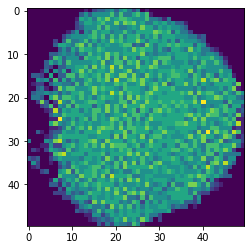

In [63]:
plt.imshow(X_unscale_test_img[ind].reshape(50,50))

In [57]:
PATH+MODEL_NAME+"Stock_Image.npy"

'/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/UpdateMeasuredData/AstraSimDat/CNN_081120_Stock_Image.npy'

In [58]:

ind = 4
X_unscale_test_scalar[ind,scalar_variables:scalar_variables+4]*1E3

array([-0.40510409,  0.37911152, -0.42488133,  0.41626165])

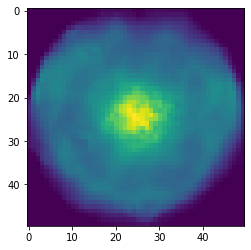

In [61]:
plt.imshow(Y_unscale_pred_img[ind].reshape(50,50))

Text(0.5, 0, 'millimeters')

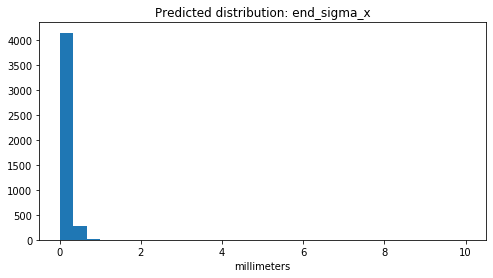

In [59]:
plt.figure(figsize = (8,4))
plt.title("Predicted distribution: "+ output_names[10])
plt.hist(Y_unscale_pred_scalar[:,ind]*1E3, bins = 30, range = (0,10)); 
plt.xlabel('millimeters')

In [ ]:
plt.figure(figsize = (8,4))
plt.title("Predicted distribution: "+ output_names[12])
plt.hist(Y_unscale_pred_scalar[:,12]*1E3, bins = 30, range = (0,10)); 
plt.xlabel('millimeters')

In [ ]:
# names = ["X-dir. minimum", "X-dir. maximum", "Y-dir. minimum", "Y-dir. maximum"]
# for i in range(4):
#     indx = np.argsort(Y_unscale_test_scalar[:,scalar_outputs+i])
#     plt.plot(Y_unscale_test_scalar[indx,scalar_outputs+i]*1E3, 'k.', label = "Test Set")
#     plt.plot(Y_unscale_pred_scalar[indx,scalar_outputs+i]*1E3, 'r.', label = "Prediction")
#     plt.title("Ordered comparison for: " + names[i])
#     plt.ylabel('Millimeters')
#     plt.legend()
#     plt.xlabel("Sample Number")
#     plt.show()

In [ ]:
# for i in indx[0:5]:
#     #ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])
#     ind = i
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,12))
#     #fig.suptitle('Test Set Image (left)  Predicted (middle)  Residual (right)')
    
#     ax1.imshow(Y_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
#     ax1.set_xlabel('millimeters')
#     ax1.set_ylabel('millimeters')
#     ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
#     ax2.set_xlabel('millimeters')
#     ax1.set_ylabel('millimeters')
    
    
#     res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
#     ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
#     yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
#     ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
#     ax3.set_xlabel('millimeters')
#     ax3.set_ylabel('millimeters')
#     plt.show()

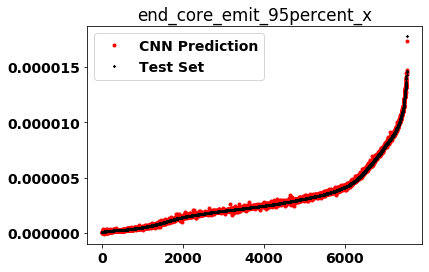

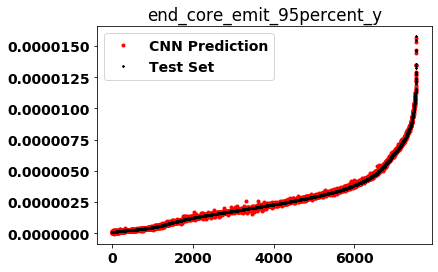

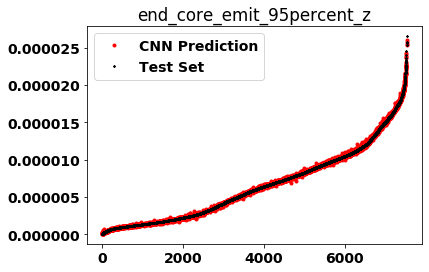

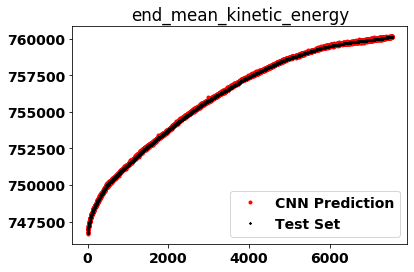

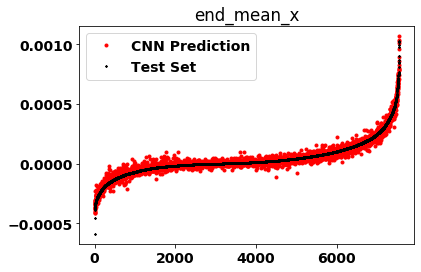

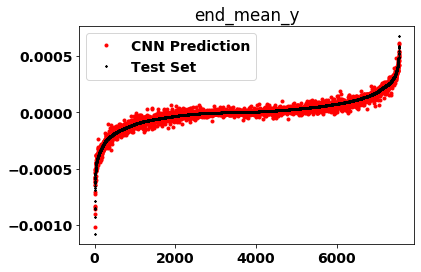

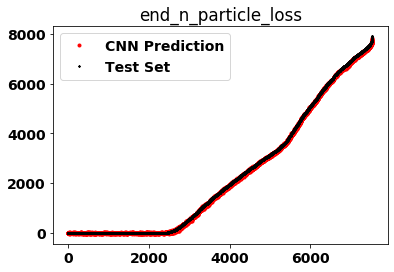

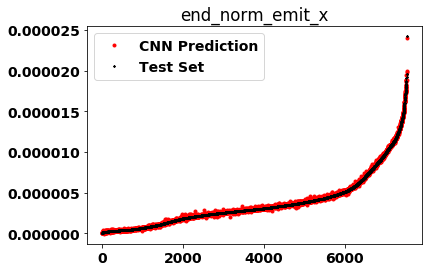

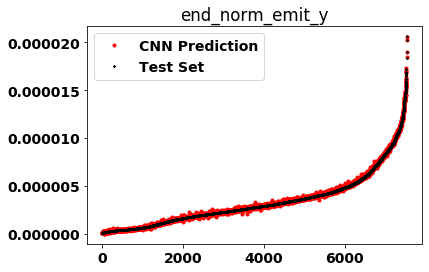

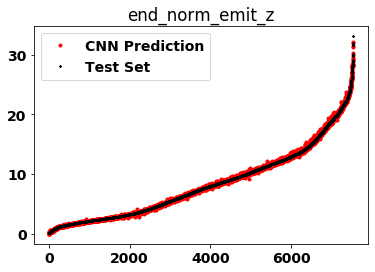

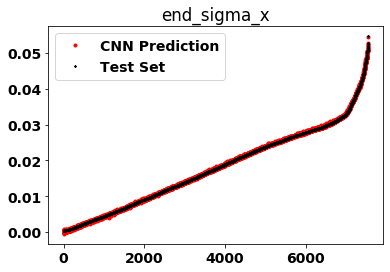

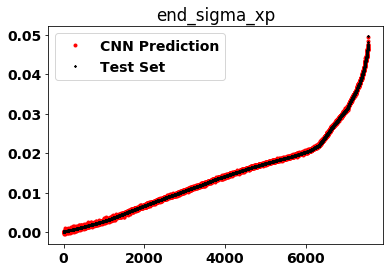

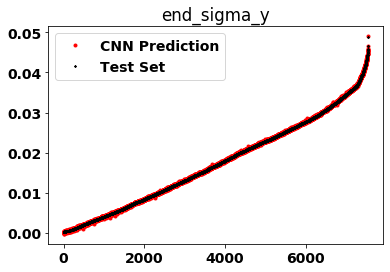

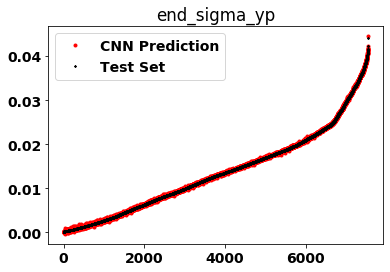

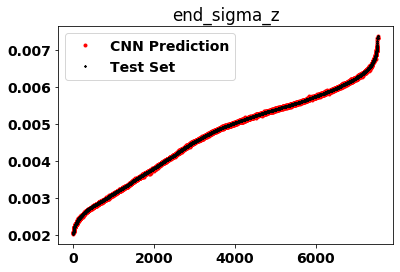

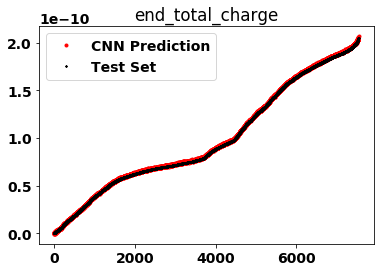

In [56]:
for i in range(scalar_outputs):
    plt.figure(figsize = (6,4))
    indx = np.argsort(Y_unscale_test_scalar[:,i])
    plt.plot(Y_unscale_pred_scalar[indx,i], 'r.', label = "CNN Prediction")
    plt.plot(Y_unscale_test_scalar[indx,i], 'k*', markersize = 2, label = "Test Set")

    plt.title(output_names[i])
    plt.legend()
    plt.show()

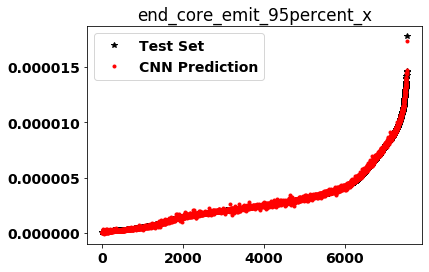

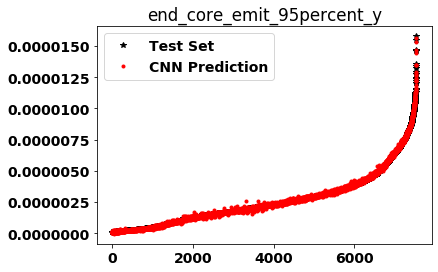

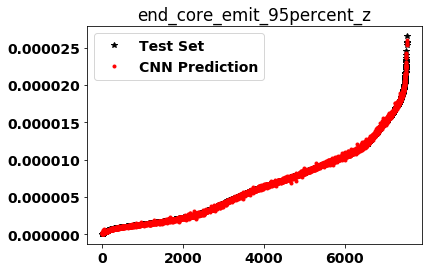

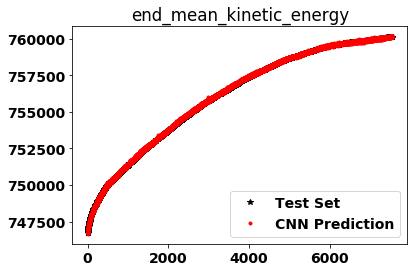

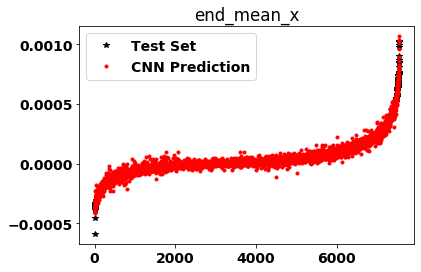

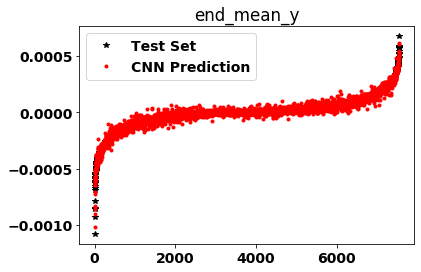

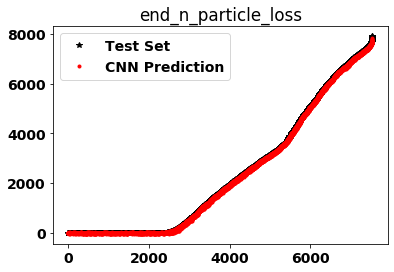

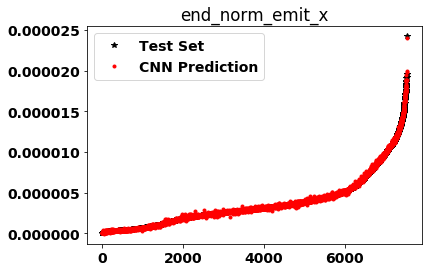

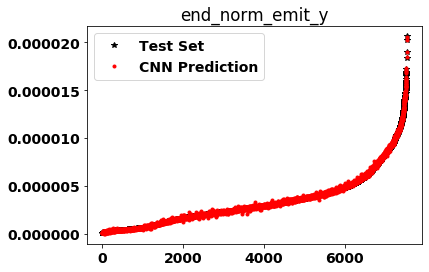

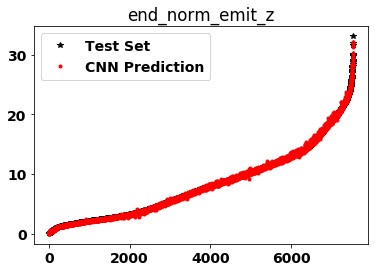

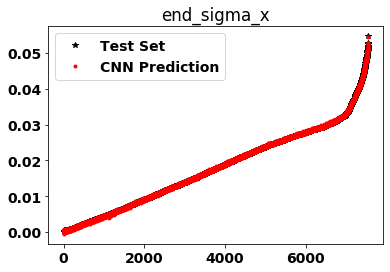

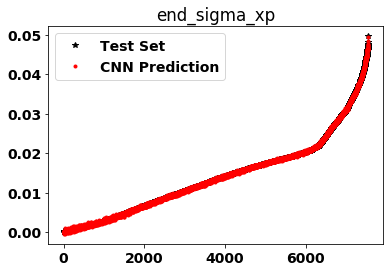

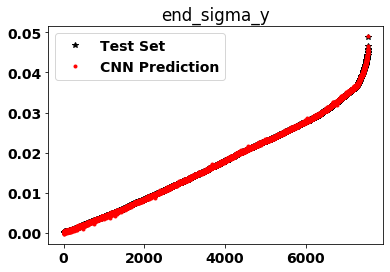

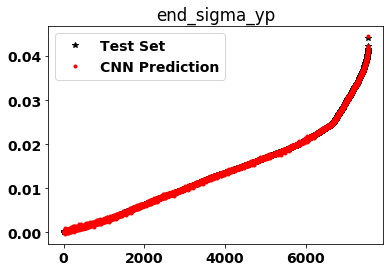

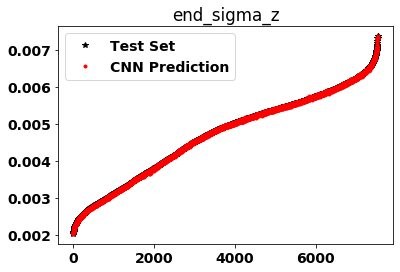

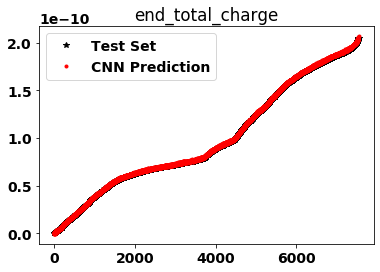

In [50]:
X_test_img

for i in range(scalar_outputs):
    indx = np.argsort(Y_unscale_test_scalar[:,i])
    plt.plot(Y_unscale_test_scalar[indx,i], 'k*', label = "Test Set")
    plt.plot(Y_unscale_pred_scalar[indx,i], 'r.', label = "CNN Prediction")
    plt.title(output_names[i])
    plt.legend()
    plt.show()

In [ ]:
np.shape(X_test_img)

In [ ]:
for i in range(10):
    #ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])

In [61]:
FILE_PATH

'/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/PrettyPics/'

['/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/PrettyPics/Example_6457.yaml', '/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/PrettyPics/Example_6370.yaml', '/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/PrettyPics/Example_4869.yaml', '/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/PrettyPics/Example_4.yaml', '/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/PrettyPics/Example_5445.yaml']


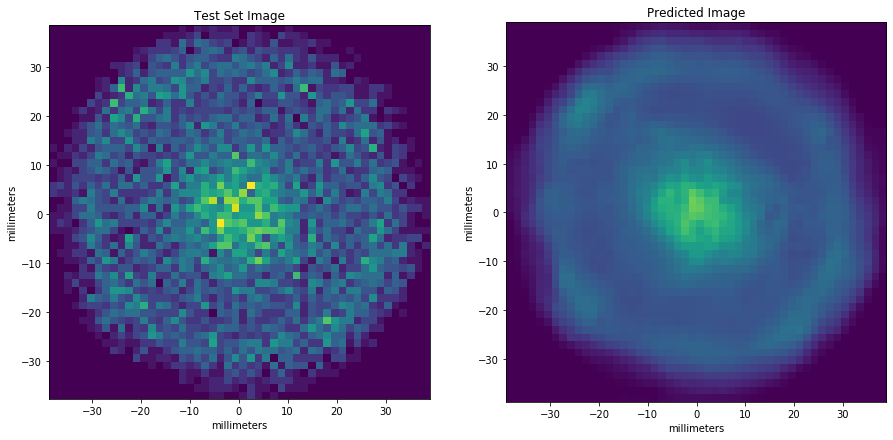

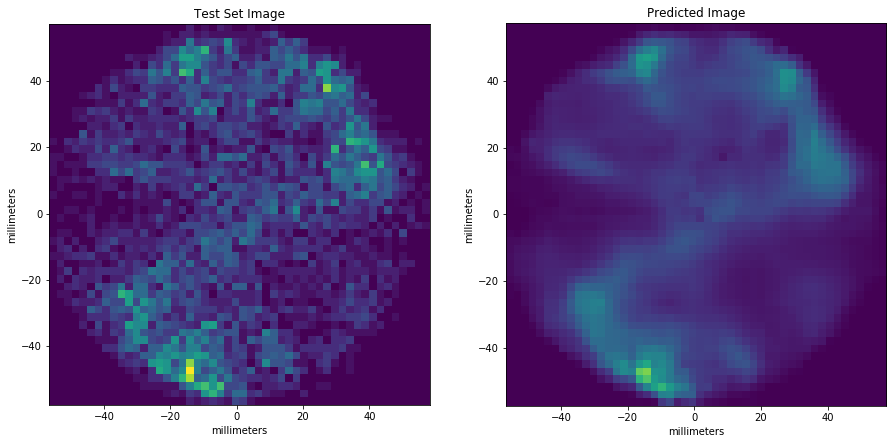

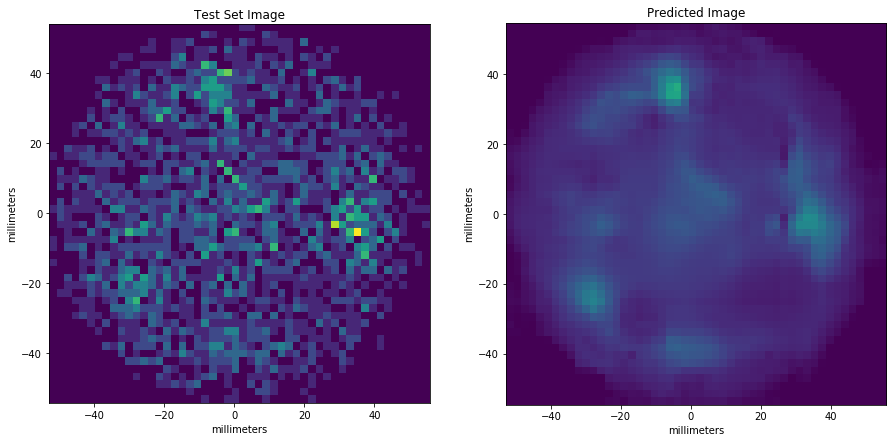

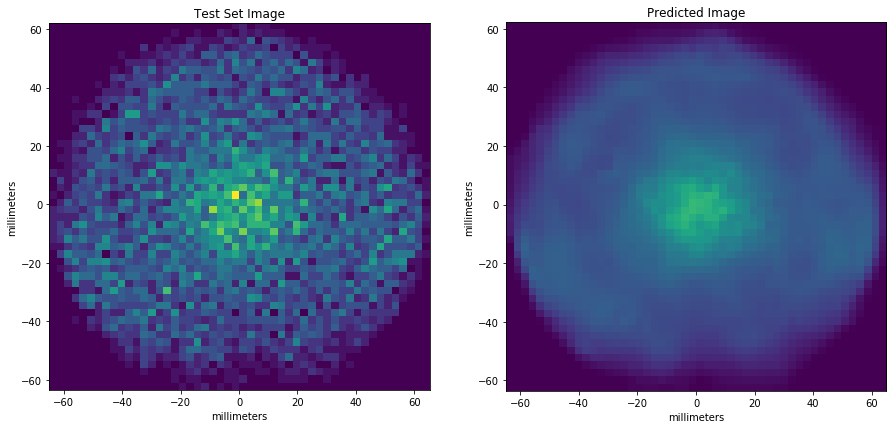

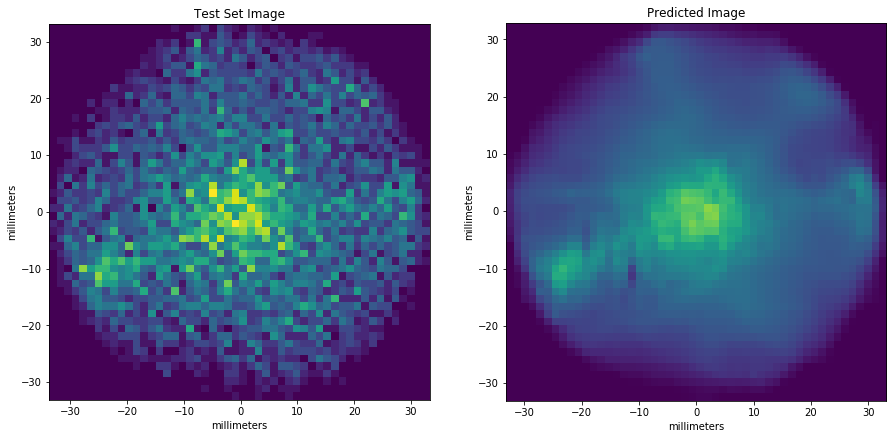

In [62]:
import glob
FILE_PATH = '/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/PrettyPics/'
examples = glob.glob(FILE_PATH+"Example*")
print(examples)
for example in examples:
    with open(example, 'r') as f:
        data = yaml.load(f)

    #print(data.keys())

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,12))

    ax1.imshow(data["test_image"].reshape(50,50), vmin = 0, vmax = (np.max(data["test_image"])), origin = "lower", extent = data["test_extents"]*1E3)
    ax1.set_title('Test Set Image')
    ax1.set_xlabel('millimeters')
    ax1.set_ylabel('millimeters')
    ax2.imshow(data["predicted_image"].reshape(50,50),  vmin = 0, vmax = (np.max(data["test_image"])), origin = "lower", extent = data["predicted_extents"]*1E3)
    ax2.set_title('Predicted Image')
    ax2.set_xlabel('millimeters')
    ax2.set_ylabel('millimeters')
    plt.show()